# Pandas Fundamentals - Complete Guide

## 📚 About This Notebook

This comprehensive notebook serves as a complete guide to **Pandas** (Python Data Analysis Library), the essential tool for data manipulation and analysis in Python.

## 🎯 Learning Objectives

By the end of this notebook, you will be able to:

1. **Data Loading & Exploration**
   - Read data from CSV files
   - Inspect DataFrames (head, tail, info, describe)
   - Understand DataFrame structure and attributes

2. **Data Selection & Filtering**
   - Select columns and rows
   - Boolean indexing and filtering
   - Use loc, iloc for advanced selection

3. **Data Manipulation**
   - Sort data by columns
   - Handle column operations
   - Drop and rename columns

4. **Grouping & Aggregation**
   - Group data by categories
   - Apply aggregate functions (sum, mean, count)
   - Create pivot tables

5. **Working with Indexes**
   - Set and reset indexes
   - Multi-level indexing
   - Sort by index

6. **Data Quality**
   - Check for duplicates
   - Understand unique values
   - Count and value distributions

## 🛠️ Prerequisites

- Basic Python knowledge (variables, functions, loops)
- Familiarity with NumPy arrays (recommended)
- Python 3.x installed with Pandas library

## 📦 Required Libraries
```python
import numpy as np
import pandas as pd
import os
```

## 📋 Notebook Structure

1. **Import & Setup** - Loading libraries and checking versions
2. **Reading Files** - Loading data from CSV
3. **Data Exploration** - Initial inspection and understanding
4. **Sorting** - Organizing data by values
5. **Filtering** - Boolean indexing and conditional selection
6. **Column Operations** - Adding, dropping, renaming columns
7. **Aggregations** - Statistical summaries and grouping
8. **Counting & Duplicates** - Data quality checks
9. **GroupBy Operations** - Advanced aggregations by categories
10. **Indexing** - Working with DataFrame indexes

## 💡 How to Use This Notebook

- Run cells sequentially from top to bottom
- Experiment with the code by changing parameters
- Pay attention to the differences between methods
- Practice with the homelessness dataset provided

## 📊 Dataset Information

**Dataset:** US Homelessness Data by State
- **Source:** `homelessness.csv`
- **Rows:** 51 (US states + DC)
- **Columns:** 5 (region, state, individuals, family_members, state_pop)

---

**Version:** 1.0  
**Pandas Version:** 2.3.1  
**Last Updated:** 2025

---

Let's begin! 🚀

---

## 📦 Import Libraries

In this section, we import the essential libraries for numerical computing and data manipulation.

In [1]:
# Import NumPy - the fundamental package for numerical computing in Python
# NumPy provides support for arrays, matrices, and mathematical operations
import numpy as np 

# Import Pandas - the powerful data analysis and manipulation library
# Pandas provides DataFrame and Series data structures for working with structured data
# Built on top of NumPy, it's essential for data analysis tasks
import pandas as pd

# Import os - Python's operating system interface module
# Used here for file path operations (joining paths, getting current directory)
# Ensures cross-platform compatibility when working with file paths
import os

In [2]:
# Display the current version of Pandas installed in your environment
# This helps ensure compatibility and understand available features
# Different versions may have different methods or behaviors
pd.__version__

'2.3.1'

---

## 📂 Reading Files

One of the most common tasks in data analysis is loading data from external files. Pandas makes this easy with built-in functions for various file formats.

### 📄 Supported File Formats

Pandas can read data from multiple file formats:

| Format | Function | Common Use Case |
|--------|----------|-----------------|
| CSV | `pd.read_csv()` | Most common, text-based |
| Excel | `pd.read_excel()` | Business data, spreadsheets |
| JSON | `pd.read_json()` | Web APIs, nested data |
| SQL | `pd.read_sql()` | Database queries |
| Parquet | `pd.read_parquet()` | Large datasets, efficient storage |
| HTML | `pd.read_html()` | Web scraping, tables |

### 📊 In This Section

We'll demonstrate:
- ✅ Loading CSV files using `pd.read_csv()`
- ✅ Using `os.path.join()` for cross-platform file paths
- ✅ Previewing data with `.head()` and `.tail()`
- ✅ Understanding the DataFrame structure

### 💡 Best Practices

1. **Always use `os.path.join()`** for file paths (works on Windows, Mac, Linux)
2. **Check the file exists** before reading (prevents errors)
3. **Preview data immediately** after loading (use `.head()`)
4. **Verify data types** and structure (use `.info()`)

Let's load our dataset! 👇

---

In [3]:
# Step 1: Construct the file path using os.path.join() for cross-platform compatibility
# os.getcwd() returns the current working directory
# os.path.join() combines directory paths safely (handles / vs \ on different OS)
# This creates the path: current_directory/dataset/homelessness.csv
path = os.path.join(os.getcwd(), 'dataset', 'homelessness.csv')

# Step 2: Read the CSV file into a Pandas DataFrame
# pd.read_csv() automatically:
#   - Detects column names from the first row
#   - Infers data types for each column
#   - Creates a DataFrame object with rows and columns
df = pd.read_csv(path)

# Step 3: Display the first 5 rows of the DataFrame
# .head() is useful for quickly inspecting the data structure and content
# Default shows 5 rows, but you can specify: .head(10) for 10 rows
df.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [4]:
# Display the last 5 rows of the DataFrame
# .tail() is useful for:
#   - Checking how the dataset ends
#   - Verifying data was fully loaded
#   - Spotting patterns at the end of sorted data
#   - Quick sanity check alongside .head()
df.tail()

# Note: You can specify number of rows: df.tail(10) for last 10 rows
# Tip: Compare .head() and .tail() to understand data distribution

,region,state,individuals,family_members,state_pop
46,South Atlantic,Virginia,3928,2047,8501286
47,Pacific,Washington,16424,5880,7523869
48,South Atlantic,West Virginia,1021,222,1804291
49,East North Central,Wisconsin,2740,2167,5807406
50,Mountain,Wyoming,434,205,577601


In [5]:
# Get the dimensions of the DataFrame (number of rows and columns)
# Returns a tuple: (rows, columns)
# This is one of the most important first checks when exploring data
df.shape

# Output format: (51, 5) means:
#   - 51 rows (observations/records)
#   - 5 columns (features/variables)

(51, 5)

In [6]:
# Display the index (row labels) of the DataFrame
# The index identifies each row and is used for row selection and alignment
# By default, Pandas creates a RangeIndex starting from 0
df.index

# Output: RangeIndex(start=0, stop=51, step=1)
# This means rows are labeled 0, 1, 2, ..., 50

RangeIndex(start=0, stop=51, step=1)

In [7]:
# Display the column names (labels) of the DataFrame
# Returns an Index object containing all column names
# Column names are used to select and manipulate specific columns
df.columns

# Output: Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')
# These are the 5 variables/features in our dataset

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [8]:
# Display comprehensive information about the DataFrame
# Shows: column names, data types, non-null counts, and memory usage
# One of the MOST IMPORTANT methods for initial data exploration
df.info()

# This method provides:
#   - Total number of rows and columns
#   - Column names and their data types (dtype)
#   - Count of non-null (non-missing) values per column
#   - Memory usage of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          51 non-null     object
 1   state           51 non-null     object
 2   individuals     51 non-null     int64 
 3   family_members  51 non-null     int64 
 4   state_pop       51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [9]:
# Generate descriptive statistics for all NUMERIC columns
# Provides a statistical summary: count, mean, std, min, quartiles, max
# Essential for understanding the distribution and range of numerical data
df.describe()

# By default, only numeric columns (int64, float64) are included
# To include all columns: df.describe(include='all')
# To include only objects: df.describe(include='object')

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


In [10]:
# Extract the underlying data as a NumPy array
# Converts the DataFrame to a 2D NumPy ndarray (rows × columns)
# Useful for mathematical operations, machine learning algorithms, or low-level manipulation
df.values

# Returns: numpy.ndarray with shape (51, 5)
# Note: This removes column names and index labels - only raw data remains
# Warning: Mixed data types (strings + integers) → dtype becomes 'object' (less efficient)

array([['East South Central', 'Alabama', 2570, 864, 4887681],
       ['Pacific', 'Alaska', 1434, 582, 735139],
       ['Mountain', 'Arizona', 7259, 2606, 7158024],
       ['West South Central', 'Arkansas', 2280, 432, 3009733],
       ['Pacific', 'California', 109008, 20964, 39461588],
       ['Mountain', 'Colorado', 7607, 3250, 5691287],
       ['New England', 'Connecticut', 2280, 1696, 3571520],
       ['South Atlantic', 'Delaware', 708, 374, 965479],
       ['South Atlantic', 'District of Columbia', 3770, 3134, 701547],
       ['South Atlantic', 'Florida', 21443, 9587, 21244317],
       ['South Atlantic', 'Georgia', 6943, 2556, 10511131],
       ['Pacific', 'Hawaii', 4131, 2399, 1420593],
       ['Mountain', 'Idaho', 1297, 715, 1750536],
       ['East North Central', 'Illinois', 6752, 3891, 12723071],
       ['East North Central', 'Indiana', 3776, 1482, 6695497],
       ['West North Central', 'Iowa', 1711, 1038, 3148618],
       ['West North Central', 'Kansas', 1443, 773, 2911359],
 

---------



## 🔄 Sorting Data

Sorting is one of the most fundamental operations in data analysis. It helps you organize data, find patterns, identify extremes, and prepare data for visualization or reporting.

### 🎯 Why Sort Data?

| Purpose | Example |
|---------|---------|
| **Find extremes** | Which states have the most/least homelessness? |
| **Identify patterns** | Are there regional trends? |
| **Prepare for analysis** | Group similar values together |
| **Create rankings** | Top 10 states by population |
| **Improve readability** | Alphabetical order for reports |

### 📊 Sorting Methods in Pandas

Pandas provides two main sorting methods:

#### 1️⃣ **`sort_values()`** - Sort by column values
```python
df.sort_values(by='column_name')           # Single column
df.sort_values(by=['col1', 'col2'])        # Multiple columns
df.sort_values(by='col', ascending=False)  # Descending order
```

#### 2️⃣ **`sort_index()`** - Sort by row index or column names
```python
df.sort_index()                  # Sort rows by index
df.sort_index(axis=1)           # Sort columns alphabetically
df.sort_index(ascending=False)  # Reverse order
```

### 🔑 Key Parameters

| Parameter | Options | Description |
|-----------|---------|-------------|
| `by` | Column name(s) | Which column(s) to sort by |
| `ascending` | True/False | Sort direction (default: True) |
| `inplace` | True/False | Modify original DataFrame or return copy |
| `na_position` | 'first'/'last' | Where to put NaN values |
| `ignore_index` | True/False | Reset index after sorting |

### 💡 Common Sorting Patterns
```python
# 1. Simple ascending sort
df.sort_values(by='individuals')

# 2. Descending sort (highest first)
df.sort_values(by='state_pop', ascending=False)

# 3. Multi-column sort (primary, then secondary)
df.sort_values(by=['region', 'state'])

# 4. Mixed sort directions
df.sort_values(by=['region', 'individuals'], 
               ascending=[True, False])

# 5. Modify original DataFrame
df.sort_values(by='state', inplace=True)
```

### 🎪 What We'll Demonstrate

In the following cells, we'll explore:
- ✅ Sorting by single column (ascending & descending)
- ✅ Multi-column sorting with different directions
- ✅ Finding top/bottom values
- ✅ The difference between creating new sorted DataFrames vs modifying in-place

### 📈 Practical Applications

1. **Rankings**: "Top 10 states by homeless population"
2. **Regional analysis**: "Sort by region, then by state"
3. **Data validation**: "Check if data is already sorted"
4. **Report preparation**: "Alphabetical state listing"

Let's start sorting! 👇

---

In [11]:
# Sort the DataFrame by 'individuals' column in descending order (highest to lowest)
# Creates a NEW sorted DataFrame - original 'df' remains unchanged
# ascending=False means we want the states with MOST homeless individuals first
df_sorted = df.sort_values(by='individuals', ascending=False)

# Display the top 5 states with the highest number of homeless individuals
# This shows which states have the biggest homelessness crisis
df_sorted.head()

# Expected top states: California, New York, Florida, Texas, Washington
# These large-population states typically have the highest numbers

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008,20964,39461588
32,Mid-Atlantic,New York,39827,52070,19530351
9,South Atlantic,Florida,21443,9587,21244317
43,West South Central,Texas,19199,6111,28628666
47,Pacific,Washington,16424,5880,7523869


In [12]:
# Display the column names of the DataFrame
# Quick reference to see all available columns before operations
# Useful when deciding which columns to sort by or select
df.columns

# Returns: Index(['region', 'state', 'individuals', 'family_members', 'state_pop'])
# This shows we have 5 columns to work with in our sorting operations

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [13]:
# Multi-column sorting with DIFFERENT directions for each column
# Primary sort: 'individuals' in ASCENDING order (low → high)
# Secondary sort: 'family_members' in DESCENDING order (high → low)
# When 'individuals' values are equal, sort by 'family_members' (highest first)
df.sort_values(by=['individuals', 'family_members'], ascending=[True, False])

# This creates a complex sort:
# 1. First, arrange by individuals (smallest to largest)
# 2. Then, within same individual counts, arrange by family_members (largest to smallest)

# Note: This returns a NEW sorted DataFrame - original 'df' is unchanged

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434,205,577601
34,West North Central,North Dakota,467,75,758080
7,South Atlantic,Delaware,708,374,965479
39,New England,Rhode Island,747,354,1058287
45,New England,Vermont,780,511,624358
29,New England,New Hampshire,835,615,1353465
41,West North Central,South Dakota,836,323,878698
26,Mountain,Montana,983,422,1060665
48,South Atlantic,West Virginia,1021,222,1804291
24,East South Central,Mississippi,1024,328,2981020


In [14]:
# Display the data type (dtype) of each column in the DataFrame
# Essential for understanding what operations you can perform on each column
# Ensures data types are correct before analysis (e.g., numbers stored as numbers, not text)
df.dtypes

# Returns a Series showing: column_name → data_type
# Common dtypes: int64, float64, object (text), datetime64, bool

region            object
state             object
individuals        int64
family_members     int64
state_pop          int64
dtype: object

In [15]:
# Check the type of the 'df' object itself
# Returns the Python class/type of the entire DataFrame object
# This is different from .dtypes (which shows column data types)
type(df)

# Output: <class 'pandas.core.frame.DataFrame'>
# Confirms that 'df' is indeed a Pandas DataFrame object

pandas.core.frame.DataFrame

In [16]:
# Checking the Python type of the 'region' column inside the DataFrame
# In Pandas, selecting a single column returns a Series object, not a list or array.
# This helps Pandas apply vectorized operations efficiently.

type(df['region'])

pandas.core.series.Series

In [17]:
# Checking the data type (dtype) of the 'region' column in the DataFrame.
# Unlike 'type()', which returns the Python type (Series),
# '.dtype' returns the NumPy-level data type stored inside the column.

df['region'].dtype

dtype('O')

In [18]:
df.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [19]:
# Selecting multiple columns: 'region' and 'state'
# Using double brackets returns a DataFrame (not a Series)
# .head() shows the first 5 rows of the selected subset

df[['region', 'state']].head()

,region,state
0,East South Central,Alabama
1,Pacific,Alaska
2,Mountain,Arizona
3,West South Central,Arkansas
4,Pacific,California


In [20]:
# Retrieving all unique (non-duplicate) values from the 'region' column.
# .unique() returns a NumPy array containing distinct values only.
# Useful for understanding categories or exploring the data.

df['region'].unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

In [21]:
# Get all unique values in the 'state' column of the DataFrame `df`
# This helps you see which distinct states are present without duplicates
df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [22]:
# Count the number of unique values in the 'region' column of the DataFrame `df`
# This tells you how many distinct regions exist in the dataset
df['region'].nunique()

9

In [23]:
# Count the number of unique values in the 'state' column of the DataFrame `df`
# This tells you how many distinct states are present in the dataset
df['state'].nunique()

51

In [24]:
# Count the occurrences of each unique value in the 'region' column of the DataFrame `df`
# This shows how many times each region appears, sorted by default in descending order
df['region'].value_counts()

region
South Atlantic        9
Mountain              8
West North Central    7
New England           6
East North Central    5
Pacific               5
East South Central    4
West South Central    4
Mid-Atlantic          3
Name: count, dtype: int64

In [25]:
# Filter the DataFrame `df` to include only rows where the 'region' column is equal to 'Pacific'
# This will return all data entries that belong to the 'Pacific' region
df[df['region'] == 'Pacific']

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434,582,735139
4,Pacific,California,109008,20964,39461588
11,Pacific,Hawaii,4131,2399,1420593
37,Pacific,Oregon,11139,3337,4181886
47,Pacific,Washington,16424,5880,7523869


In [26]:
# Filter the DataFrame `df` to include only rows where the 'individuals' column has values greater than 12354
# This is useful to focus on entries with high counts of individuals
df[df['individuals'] > 12354]

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008,20964,39461588
9,South Atlantic,Florida,21443,9587,21244317
32,Mid-Atlantic,New York,39827,52070,19530351
43,West South Central,Texas,19199,6111,28628666
47,Pacific,Washington,16424,5880,7523869


In [27]:
# Filter the DataFrame `df` to include only rows that meet both conditions:
# 1. 'region' is equal to 'Pacific'
# 2. 'individuals' is greater than 12354
# This is useful to narrow down the dataset to a specific region with high individual counts
df[(df['region'] == 'Pacific') & (df['individuals'] > 12354)]


,region,state,individuals,family_members,state_pop
4,Pacific,California,109008,20964,39461588
47,Pacific,Washington,16424,5880,7523869


In [28]:
# Filter the DataFrame `df` to include rows where the 'region' column is either 'Pacific' or 'Mountain'
# The `|` operator represents a logical OR, so rows matching any of the conditions are included
df[(df['region'] == 'Pacific') | (df['region'] == 'Mountain')]


,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
4,Pacific,California,109008,20964,39461588
5,Mountain,Colorado,7607,3250,5691287
11,Pacific,Hawaii,4131,2399,1420593
12,Mountain,Idaho,1297,715,1750536
26,Mountain,Montana,983,422,1060665
28,Mountain,Nevada,7058,486,3027341
31,Mountain,New Mexico,1949,602,2092741
37,Pacific,Oregon,11139,3337,4181886


In [29]:
# Filter the DataFrame `df` to include rows that meet at least one of the following conditions:
# 1. 'region' is equal to 'Pacific'
# 2. 'individuals' is greater than 12354
# The `|` operator represents a logical OR, so any row satisfying either condition will be included
df[(df['region'] == 'Pacific') | (df['individuals'] > 12354)]


,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434,582,735139
4,Pacific,California,109008,20964,39461588
9,South Atlantic,Florida,21443,9587,21244317
11,Pacific,Hawaii,4131,2399,1420593
32,Mid-Atlantic,New York,39827,52070,19530351
37,Pacific,Oregon,11139,3337,4181886
43,West South Central,Texas,19199,6111,28628666
47,Pacific,Washington,16424,5880,7523869


In [30]:
# Get all unique values in the 'region' column of the DataFrame `df`
# This shows which distinct regions are present in the dataset without duplicates
df['region'].unique()


array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

In [31]:
# Create a list of regions we want to filter for
lst = ['New England', 'Mountain', 'Mid-Atlantic']

# Filter the DataFrame `df` to include only rows where the 'region' column is in the `lst`
# The `.isin()` method is cleaner and more efficient than multiple OR conditions
df[df['region'].isin(lst)]


,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259,2606,7158024
5,Mountain,Colorado,7607,3250,5691287
6,New England,Connecticut,2280,1696,3571520
12,Mountain,Idaho,1297,715,1750536
19,New England,Maine,1450,1066,1339057
21,New England,Massachusetts,6811,13257,6882635
26,Mountain,Montana,983,422,1060665
28,Mountain,Nevada,7058,486,3027341
29,New England,New Hampshire,835,615,1353465
30,Mid-Atlantic,New Jersey,6048,3350,8886025


In [32]:
# Create a list of regions we want to exclude
lst = ['New England', 'Mountain', 'Mid-Atlantic']

# Filter the DataFrame `df` to include only rows where the 'region' column is NOT in the `lst`
# The `~` operator negates the condition, effectively selecting all other regions
df[~df['region'].isin(lst)]


,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588
7,South Atlantic,Delaware,708,374,965479
8,South Atlantic,District of Columbia,3770,3134,701547
9,South Atlantic,Florida,21443,9587,21244317
10,South Atlantic,Georgia,6943,2556,10511131
11,Pacific,Hawaii,4131,2399,1420593
13,East North Central,Illinois,6752,3891,12723071


In [33]:
# Filter the DataFrame `df` to exclude rows that meet either of the following conditions:
# 1. 'region' is 'Pacific'
# 2. 'individuals' is greater than 16424
# The `|` operator is a logical OR, and the `~` operator negates the whole condition
# So only rows that do NOT satisfy either condition will be returned
df[~((df['region'] == 'Pacific') | (df['individuals'] > 16424))]


,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
5,Mountain,Colorado,7607,3250,5691287
6,New England,Connecticut,2280,1696,3571520
7,South Atlantic,Delaware,708,374,965479
8,South Atlantic,District of Columbia,3770,3134,701547
10,South Atlantic,Georgia,6943,2556,10511131
12,Mountain,Idaho,1297,715,1750536
13,East North Central,Illinois,6752,3891,12723071


* `Cols`

In [34]:
# Create a new column 'no of family ' in the DataFrame `df`
# This column is calculated by dividing 'state_pop' by 'family_members'
# Essentially, it gives an approximate number of families in each state
df['no of family '] = df['state_pop'] / df['family_members']


In [35]:
# Standardize the column names of the DataFrame `df` by applying multiple string operations:
# 1. `.str.lower()` converts all column names to lowercase
# 2. `.str.strip()` removes any leading or trailing whitespace
# 3. `.str.replace(' ', '_')` replaces spaces with underscores for easier referencing
# 4. `.str.replace('.', '')` removes any periods from column names
# This makes column names consistent and easier to work with in code
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')


In [36]:
# Display the column names of the DataFrame `df`
# Useful to check the current names after any renaming or cleaning operations
df.columns


Index(['region', 'state', 'individuals', 'family_members', 'state_pop',
       'no_of_family'],
      dtype='object')

In [37]:
# Display the first 5 rows of the DataFrame `df` by default
# Useful for quickly inspecting the structure and contents of the dataset
df.head()


,region,state,individuals,family_members,state_pop,no_of_family
0,East South Central,Alabama,2570,864,4887681,5657.038194
1,Pacific,Alaska,1434,582,735139,1263.125430
2,Mountain,Arizona,7259,2606,7158024,2746.747506
3,West South Central,Arkansas,2280,432,3009733,6966.974537
4,Pacific,California,109008,20964,39461588,1882.350124


In [38]:
# Drop the column 'no_of_family' from the DataFrame `df`
# `columns=['no_of_family']` specifies the column to remove
# `axis=1` indicates that we are dropping a column (not a row)
# `inplace=True` modifies the original DataFrame directly instead of returning a new one
df.drop(columns=['no_of_family'], axis=1, inplace=True)


In [39]:
# Display the first 5 rows of the DataFrame `df` by default
# Useful for quickly inspecting the current state of the dataset after operations like dropping rows or columns
df.head()


,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [40]:
# Drop the rows with index 0, 1, and 2 from the DataFrame `df`
# `index=[0, 1, 2]` specifies which rows to remove
# `axis=0` indicates that we are dropping rows (not columns)
# By default, this returns a new DataFrame and does not modify `df` unless `inplace=True` is added
df.drop(index=[0, 1, 2], axis=0)


,region,state,individuals,family_members,state_pop
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588
5,Mountain,Colorado,7607,3250,5691287
6,New England,Connecticut,2280,1696,3571520
7,South Atlantic,Delaware,708,374,965479
8,South Atlantic,District of Columbia,3770,3134,701547
9,South Atlantic,Florida,21443,9587,21244317
10,South Atlantic,Georgia,6943,2556,10511131
11,Pacific,Hawaii,4131,2399,1420593
12,Mountain,Idaho,1297,715,1750536


In [41]:
# Calculate basic statistics for the 'individuals' column in the DataFrame `df`:

# .mean()   -> Returns the average value of the column
# .median() -> Returns the middle value when the column is sorted
# .std()    -> Returns the standard deviation (measure of spread) of the column
# .var()    -> Returns the variance (square of standard deviation) of the column

df['individuals'].mean(), df['individuals'].median(), df['individuals'].std(), df['individuals'].var()


(np.float64(7225.78431372549),
 np.float64(3082.0),
 np.float64(15991.025083231812),
 np.float64(255712883.21254897))

In [42]:
# Find the most frequent value(s) in the 'region' column of the DataFrame `df`
# .mode() returns the mode(s) of the column
# .tolist() converts the result to a standard Python list
df['region'].mode().tolist()


['South Atlantic']

In [43]:
# Count the occurrences of each unique value in the 'region' column of the DataFrame `df`
# The result is sorted in descending order by default, showing the most frequent regions first
df['region'].value_counts()


region
South Atlantic        9
Mountain              8
West North Central    7
New England           6
East North Central    5
Pacific               5
East South Central    4
West South Central    4
Mid-Atlantic          3
Name: count, dtype: int64

In [44]:
# Count the occurrences of each unique value in the 'state' column of the DataFrame `df`
# The result is sorted in descending order by default, showing the states with the most entries first
df['state'].value_counts()


state
Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    1
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   1
Maryland                1
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             1
Missouri                1
Montana                 1
Nebraska                1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Pennsy

In [45]:
# Find the number of mode(s) in the 'state' column of the DataFrame `df`
# 1. df['state'].mode()      -> Returns the most frequent value(s)
# 2. .tolist()               -> Converts the mode(s) to a Python list
# 3. len(...)                -> Counts how many mode values exist
len(df['state'].mode().tolist())


51

In [46]:
# Display the data types of all columns in the DataFrame `df`
# Useful to check whether columns are numeric, object (string), datetime, etc.
df.dtypes


region            object
state             object
individuals        int64
family_members     int64
state_pop          int64
dtype: object

In [47]:
# Select all columns in `df` that have the data type 'int64' (integer columns)
# 1. df.select_dtypes(include=['int64']) -> Filters the DataFrame to only integer columns
# 2. .columns -> Gets the column names of these integer columns
# 3. .tolist() -> Converts the Index object to a standard Python list
num_cols = df.select_dtypes(include=['int64']).columns.tolist()

# Display the list of integer column names
num_cols


['individuals', 'family_members', 'state_pop']

In [48]:
# Select all columns in `df` that are NOT of type 'int64' or 'float' (i.e., categorical or object columns)
# 1. df.select_dtypes(exclude=['int64', 'float']) -> Filters the DataFrame to exclude numeric columns
# 2. .columns -> Gets the column names of these non-numeric columns
# 3. .tolist() -> Converts the Index object to a standard Python list
categ_cols = df.select_dtypes(exclude=['int64', 'float']).columns.tolist()

# Display the list of categorical column names
categ_cols


['region', 'state']

In [49]:
# Get all columns in `df` that are NOT in the list of numeric columns `num_cols`
# 1. df.columns.tolist() -> Convert all column names to a Python list
# 2. set(...) -> Convert the list to a set for set operations
# 3. set(df.columns.tolist()) - set(num_cols) -> Subtract numeric columns from all columns to get non-numeric columns
# 4. list(...) -> Convert the resulting set back to a list
list(set(df.columns.tolist()) - set(num_cols))


['region', 'state']

In [50]:
# Calculate the correlation matrix for all numeric columns in the DataFrame `df`
# 1. df[num_cols] -> Select only the numeric columns
# 2. .corr() -> Compute pairwise correlation between columns (default is Pearson correlation)
# The resulting matrix shows how strongly each pair of numeric columns is linearly related
df[num_cols].corr()


,individuals,family_members,state_pop
individuals,1.000000,0.631426,0.834960
family_members,0.631426,1.000000,0.589913
state_pop,0.834960,0.589913,1.000000


In [51]:
# Calculate specific quantiles for the 'state_pop' and 'individuals' columns in the DataFrame `df`
# 1. df[['state_pop', 'individuals']] -> Select the two columns of interest
# 2. .quantile(q=[0.3, 0.25, 0.5, 0.75, 0.95]) -> Compute the values at the 30%, 25%, 50%, 75%, and 95% quantiles
# Quantiles give insight into the distribution of the data, showing thresholds below which a certain percentage of data falls
df[['state_pop', 'individuals']].quantile(q=[0.3, 0.25, 0.5, 0.75, 0.95])


,state_pop,individuals
0.30,2092741.0,1745.0
0.25,1777413.5,1446.5
0.50,4461153.0,3082.0
0.75,7340946.5,6781.5
0.95,20387334.0,20321.0


In [52]:
# Generate descriptive statistics for all numeric columns in the DataFrame `df`
# This includes count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)
# Very useful for a quick overview of the dataset's distribution and summary
df.describe()


,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


# pandas Counting Operations

## Overview
Counting is a fundamental operation in pandas for analyzing data frequency, non-null values, and occurrences. Pandas provides several methods to count data in different ways.

## Main Counting Methods

### `count()` - Count Non-Null Values
```python
# Count non-null values in each column
df.count()

# Count non-null values in a specific column
df['column_name'].count()

# Count per group
df.groupby('category')['values'].count()
```

### `value_counts()` - Count Unique Values
```python
# Count frequency of each unique value
df['column_name'].value_counts()

# Include NaN values
df['column_name'].value_counts(dropna=False)

# Get proportions instead of counts
df['column_name'].value_counts(normalize=True)

# Sort by value instead of count
df['column_name'].value_counts(sort=False)
```

### `size()` - Count Group Sizes (Including NaN)
```python
# Count total rows per group (includes NaN)
df.groupby('category').size()

# Difference: size() includes NaN, count() excludes NaN
```

### `nunique()` - Count Unique Values
```python
# Count number of unique values in a column
df['column_name'].nunique()

# Count unique values per group
df.groupby('category')['product'].nunique()

# Count unique across entire DataFrame
df.nunique()
```

## Advanced Counting Techniques

### Count Occurrences with Conditions
```python
# Count rows meeting a condition
(df['age'] > 18).sum()

# Count using query
df.query('age > 18').shape[0]

# Count per group with condition
df[df['age'] > 18].groupby('category').size()
```

### Count Missing Values
```python
# Count missing values per column
df.isnull().sum()

# Count missing values per row
df.isnull().sum(axis=1)

# Percentage of missing values
df.isnull().mean() * 100
```

### Cross-Tabulation Counting
```python
# Count combinations of two variables
pd.crosstab(df['category'], df['region'])

# With margins (totals)
pd.crosstab(df['category'], df['region'], margins=True)

# With normalize for proportions
pd.crosstab(df['category'], df['region'], normalize='all')
```

### Binned Counting
```python
# Count values in bins
pd.cut(df['age'], bins=[0, 18, 35, 50, 100]).value_counts()

# With custom labels
pd.cut(df['age'], bins=[0, 18, 35, 50, 100], 
       labels=['Child', 'Young Adult', 'Adult', 'Senior']).value_counts()
```

## Common Use Cases

### Count Duplicates
```python
# Count duplicate rows
df.duplicated().sum()

# Count duplicates in specific columns
df.duplicated(subset=['name', 'email']).sum()
```

### Count by Multiple Columns
```python
# Count combinations
df.groupby(['category', 'region']).size()

# Reset index for better formatting
df.groupby(['category', 'region']).size().reset_index(name='count')
```

### Cumulative Counting
```python
# Cumulative count
df['cumcount'] = df.groupby('category').cumcount()

# Running total
df['running_total'] = df.groupby('category')['value'].cumsum()
```

## Performance Tips
* Use `value_counts()` instead of `groupby().size()` for single column counting (faster)
* Use `size()` instead of `count()` when NaN values don't matter
* For large datasets, consider `nunique(approx=True)` for approximate counts

In [53]:
# Filter the DataFrame `df` to show all duplicate rows
# df.duplicated() returns a boolean Series indicating whether each row is a duplicate (True) or not (False)
# Using it inside df[...] returns only the rows that appear more than once
df[df.duplicated()]


,region,state,individuals,family_members,state_pop


In [54]:
# Display the shape of the DataFrame `df`
# Returns a tuple (number_of_rows, number_of_columns)
# Useful to quickly understand the size of the dataset
df.shape


(51, 5)

In [55]:
# Count the number of unique values in the 'region' column of the DataFrame `df`
# This tells you how many distinct regions are present in the dataset
df['region'].nunique()


9

In [56]:
# Find duplicate rows in the DataFrame `df` based only on the 'region' column
# 1. df.duplicated(subset=['region']) -> Returns True for rows where 'region' value has appeared before
# 2. df[...] -> Filters the DataFrame to include only these duplicate rows
# 3. .shape -> Returns the number of duplicate rows and columns as a tuple (rows, columns)
df[df.duplicated(subset=['region'])].shape


(42, 5)

In [57]:
# Filter the DataFrame `df` to show duplicate rows based on both 'region' and 'state' columns
# 1. df.duplicated(subset=['region', 'state']) -> Returns True for rows where the combination of 'region' and 'state' has appeared before
# 2. df[...] -> Selects only those duplicate rows for inspection
df[df.duplicated(subset=['region', 'state'])]


,region,state,individuals,family_members,state_pop


In [58]:
# Display the last 15 rows of the DataFrame `df`
# Useful for quickly inspecting the end of the dataset
df.tail(15)


,region,state,individuals,family_members,state_pop
36,West South Central,Oklahoma,2823,1048,3940235
37,Pacific,Oregon,11139,3337,4181886
38,Mid-Atlantic,Pennsylvania,8163,5349,12800922
39,New England,Rhode Island,747,354,1058287
40,South Atlantic,South Carolina,3082,851,5084156
41,West North Central,South Dakota,836,323,878698
42,East South Central,Tennessee,6139,1744,6771631
43,West South Central,Texas,19199,6111,28628666
44,Mountain,Utah,1904,972,3153550
45,New England,Vermont,780,511,624358


In [59]:
# Keep only the last occurrence of each unique 'region' and remove earlier duplicates
# 1. df.duplicated(subset=['region'], keep='last') -> Marks all duplicates except the last occurrence as True
# 2. ~ (tilde) -> Negates the boolean mask to select the last occurrence of each region
# 3. df[...] -> Filters the DataFrame accordingly
df[~df.duplicated(subset=['region'], keep='last')]


,region,state,individuals,family_members,state_pop
38,Mid-Atlantic,Pennsylvania,8163,5349,12800922
41,West North Central,South Dakota,836,323,878698
42,East South Central,Tennessee,6139,1744,6771631
43,West South Central,Texas,19199,6111,28628666
45,New England,Vermont,780,511,624358
47,Pacific,Washington,16424,5880,7523869
48,South Atlantic,West Virginia,1021,222,1804291
49,East North Central,Wisconsin,2740,2167,5807406
50,Mountain,Wyoming,434,205,577601


In [60]:
# Remove duplicate rows from the DataFrame `df` and return the shape of the resulting DataFrame
# 1. subset=None -> Consider all columns when identifying duplicates
# 2. keep='first' -> Keep the first occurrence of each duplicate and drop the rest
# 3. .shape -> Returns a tuple (number_of_rows, number_of_columns) of the DataFrame after removing duplicates
df.drop_duplicates(subset=None, keep='first').shape


(51, 5)

In [61]:
# Remove duplicate rows from the DataFrame `df` based only on the 'region' column
# 1. subset=['region'] -> Consider only the 'region' column when identifying duplicates
# 2. keep='first' -> Keep the first occurrence of each region and drop the rest
# This returns a new DataFrame with duplicates removed based on 'region'
df.drop_duplicates(subset=['region'], keep='first')


,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
6,New England,Connecticut,2280,1696,3571520
7,South Atlantic,Delaware,708,374,965479
13,East North Central,Illinois,6752,3891,12723071
15,West North Central,Iowa,1711,1038,3148618
30,Mid-Atlantic,New Jersey,6048,3350,8886025


In [62]:
# Remove duplicate rows from the DataFrame `df` based on both 'region' and 'state' columns
# 1. subset=['region', 'state'] -> Consider the combination of 'region' and 'state' when identifying duplicates
# 2. keep='first' -> Keep the first occurrence of each combination and drop the rest
# 3. .shape -> Return the shape (number_of_rows, number_of_columns) of the resulting DataFrame
df.drop_duplicates(subset=['region', 'state'], keep='first').shape   # Use this if you want to apply logic on unique region-state pairs


(51, 5)

In [63]:
# Get all unique values from the 'region' column of the DataFrame `df` using pandas' pd.unique() function
# Returns a NumPy array containing each distinct region exactly once
pd.unique(df['region'])


array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

# pandas GroupBy

## Overview
`GroupBy` is a powerful pandas operation that allows you to split data into groups based on some criteria, apply a function to each group independently, and combine the results. This follows the "split-apply-combine" pattern.

## Basic Syntax
```python
df.groupby(by=None, axis=0, level=None, as_index=True, sort=True)
```

## Common Parameters
* `by` - Column name(s) or grouper to group by
* `axis` - 0 for rows (default), 1 for columns
* `as_index` - Return group labels as index (default True)
* `sort` - Sort group keys (default True)

## Basic Usage
```python
# Group by single column
df.groupby('category').sum()

# Group by multiple columns
df.groupby(['category', 'region']).mean()

# Group and aggregate specific columns
df.groupby('category')['sales'].sum()
```

## Common Aggregation Functions
* `sum()` - Sum of values
* `mean()` - Average of values
* `count()` - Count of non-null values
* `min()` / `max()` - Minimum/maximum values
* `std()` / `var()` - Standard deviation/variance
* `first()` / `last()` - First/last value in group

## Multiple Aggregations
```python
# Using agg() with multiple functions
df.groupby('category').agg({
    'sales': ['sum', 'mean', 'count'],
    'profit': 'sum'
})

# Named aggregations (pandas 0.25+)
df.groupby('category').agg(
    total_sales=('sales', 'sum'),
    avg_sales=('sales', 'mean')
)
```

## Iterating Over Groups
```python
for name, group in df.groupby('category'):
    print(f"Group: {name}")
    print(group)
```

## Filtering Groups
```python
# Keep groups with more than 5 items
df.groupby('category').filter(lambda x: len(x) > 5)
```

## Transform Operations
```python
# Normalize values within each group
df['normalized'] = df.groupby('category')['value'].transform(
    lambda x: (x - x.mean()) / x.std()
)
```

In [64]:
# Ex: Get mean of family members per each region

In [65]:
# Get all unique values from the 'region' column of the DataFrame `df`
# Similar to pd.unique(df['region']), this returns a NumPy array of distinct regions
df['region'].unique()


array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

In [66]:
# Group the DataFrame `df` by the 'region' column and calculate the mean of 'family_members' for each group
# 1. df.groupby(by='region') -> Groups the data by unique values in 'region'
# 2. ['family_members'] -> Selects the 'family_members' column to perform aggregation on
# 3. .mean() -> Computes the average number of family members for each region
df.groupby(by='region')['family_members'].mean()


region
East North Central     2800.400000
East South Central      972.250000
Mid-Atlantic          20256.333333
Mountain               1157.250000
New England            2916.500000
Pacific                6632.400000
South Atlantic         2646.444444
West North Central     1177.428571
West South Central     2027.500000
Name: family_members, dtype: float64

In [67]:
# Display the column names of the DataFrame `df`
# Useful to quickly check the current column names after cleaning, renaming, or adding new columns
df.columns


Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [68]:
# Calculate the total number of individuals for each region in the DataFrame `df`
# 1. df.groupby(by='region') -> Groups the data by unique values in 'region'
# 2. ['individuals'] -> Selects the 'individuals' column to perform aggregation on
# 3. .sum() -> Computes the sum of 'individuals' for each region
df.groupby(by='region')['individuals'].sum()


region
East North Central     25406
East South Central     12468
Mid-Atlantic           54038
Mountain               28491
New England            12903
Pacific               142136
South Atlantic         52260
West North Central     13971
West South Central     26842
Name: individuals, dtype: int64

In [69]:
# Calculate the total number of family members and individuals for each region in the DataFrame `df`
# 1. df.groupby(by='region') -> Groups the data by unique values in 'region'
# 2. [['family_members', 'individuals']] -> Selects the columns to aggregate
# 3. .sum() -> Computes the sum of each selected column for every region
df.groupby(by='region')[['family_members', 'individuals']].sum()


,family_members,individuals
region,,
East North Central,14002,25406
East South Central,3889,12468
Mid-Atlantic,60769,54038
Mountain,9258,28491
New England,17499,12903
Pacific,33162,142136
South Atlantic,23818,52260
West North Central,8242,13971
West South Central,8110,26842


In [70]:
# Perform multiple aggregations on 'family_members' and 'individuals' for each region
# 1. df.groupby(by='region') -> Groups the data by the 'region' column
# 2. [['family_members', 'individuals']] -> Selects the columns to aggregate
# 3. .agg(['min', 'max', 'sum', 'mean', 'median']) -> Apply multiple aggregation functions:
#    - min: minimum value per group
#    - max: maximum value per group
#    - sum: total sum per group
#    - mean: average per group
#    - median: median value per group
df.groupby(by='region')[['family_members', 'individuals']].agg(['min', 'max', 'sum', 'mean', 'median'])


family_members                                      \
                              min    max    sum          mean  median   
region                                                                  
East North Central           1482   3891  14002   2800.400000  3142.0   
East South Central            328   1744   3889    972.250000   908.5   
Mid-Atlantic                 3350  52070  60769  20256.333333  5349.0   
Mountain                      205   3250   9258   1157.250000   658.5   
New England                   354  13257  17499   2916.500000   840.5   
Pacific                       582  20964  33162   6632.400000  3337.0   
South Atlantic                222   9587  23818   2646.444444  2230.0   
West North Central             75   3250   8242   1177.428571   773.0   
West South Central            432   6111   8110   2027.500000   783.5   

                   individuals                                         
                           min     max     sum          mean   median  
region                                                                 
East North Central        2740    6929   25406   5081.200000   5209.0  
East South Central        1024    6139   12468   3117.000000   2652.5  
Mid-Atlantic              6048   39827   54038  18012.666667   8163.0  
Mountain                   434    7607   28491   3561.375000   1926.5  
New England                747    6811   12903   2150.500000   1142.5  
Pacific                   1434  109008  142136  28427.200000  11139.0  
South Atlantic             708   21443   52260   5806.666667   3928.0  
West North Central         467    3993   13971   1995.857143   1711.0  
West South Central        2280   19199   26842   6710.500000   2681.5

In [71]:
# Filter the DataFrame `df` to include only rows where:
# 1. 'region' is 'East North Central'
# 2. 'state' is 'Michigan'
# The & operator is used for logical AND, so both conditions must be true
df[(df['region'] == 'East North Central') & (df['state'] == 'Michigan')]


,region,state,individuals,family_members,state_pop
22,East North Central,Michigan,5209,3142,9984072


In [72]:
# Perform multiple aggregations on 'family_members' and 'individuals' for each combination of 'region' and 'state'
# 1. df.groupby(by=['region', 'state']) -> Groups the data by both 'region' and 'state'
# 2. [['family_members', 'individuals']] -> Selects the columns to aggregate
# 3. .agg(['min', 'max', 'sum', 'mean', 'median']) -> Apply multiple aggregation functions:
#    - min: minimum value per group
#    - max: maximum value per group
#    - sum: total sum per group
#    - mean: average per group
#    - median: median value per group
# The result is a multi-level column DataFrame showing these statistics for each region-state combination
df.groupby(by=['region', 'state'])[['family_members', 'individuals']].agg(['min', 'max', 'sum', 'mean', 'median'])


family_members                         \
                                                   min    max    sum     mean   
region             state                                                        
East North Central Illinois                       3891   3891   3891   3891.0   
                   Indiana                        1482   1482   1482   1482.0   
                   Michigan                       3142   3142   3142   3142.0   
                   Ohio                           3320   3320   3320   3320.0   
                   Wisconsin                      2167   2167   2167   2167.0   
East South Central Alabama                         864    864    864    864.0   
                   Kentucky                        953    953    953    953.0   
                   Mississippi                     328    328    328    328.0   
                   Tennessee                      1744   1744   1744   1744.0   
Mid-Atlantic       New Jersey                     3350   3350   3350   3350.0   
                   New York                      52070  52070  52070  52070.0   
                   Pennsylvania                   5349   5349   5349   5349.0   
Mountain           Arizona                        2606   2606   2606   2606.0   
                   Colorado                       3250   3250   3250   3250.0   
                   Idaho                           715    715    715    715.0   
                   Montana                         422    422    422    422.0   
                   Nevada                          486    486    486    486.0   
                   New Mexico                      602    602    602    602.0   
                   Utah                            972    972    972    972.0   
                   Wyoming                         205    205    205    205.0   
New England        Connecticut                    1696   1696   1696   1696.0   
                   Maine                          1066   1066   1066   1066.0   
                   Massachusetts                 13257  13257  13257  13257.0   
                   New Hampshire                   615    615    615    615.0   
                   Rhode Island                    354    354    354    354.0   
                   Vermont                         511    511    511    511.0   
Pacific            Alaska                          582    582    582    582.0   
                   California                    20964  20964  20964  20964.0   
                   Hawaii                         2399   2399   2399   2399.0   
                   Oregon                         3337   3337   3337   3337.0   
                   Washington                     5880   5880   5880   5880.0   
South Atlantic     Delaware                        374    374    374    374.0   
                   District of Columbia           3134   3134   3134   3134.0   
                   Florida                        9587   9587   9587   9587.0   
                   Georgia                        2556   2556   2556   2556.0   
                   Maryland                       2230   2230   2230   2230.0   
                   North Carolina                 2817   2817   2817   2817.0   
                   South Carolina                  851    851    851    851.0   
                   Virginia                       2047   2047   2047   2047.0   
                   West Virginia                   222    222    222    222.0   
West North Central Iowa                           1038   1038   1038   1038.0   
                   Kansas                          773    773    773    773.0   
                   Minnesota                      3250   3250   3250   3250.0   
                   Missouri                       2107   2107   2107   2107.0   
                   Nebraska                        676    676    676    676.0   
                   North Dakota                     75     75     75     75.0   
                   South Dakota                    323    323    323   

In [73]:
# Create a pivot table from the DataFrame `df` and save it as a CSV file
# 1. index=['region', 'state'] -> Group the data by 'region' and 'state'
# 2. values=['family_members', 'individuals'] -> Select the columns to aggregate
# 3. aggfunc=['min', 'max', 'mean', 'median', 'sum'] -> Apply multiple aggregation functions
# 4. .to_csv(...) -> Save the resulting pivot table to a CSV file named 'pivot_table.csv' in the current working directory
df.pivot_table(
    index=['region', 'state'],
    values=['family_members', 'individuals'],
    aggfunc=['min', 'max', 'mean', 'median', 'sum']
).to_csv(os.path.join(os.getcwd(), 'pivot_table.csv'))


--------

In [74]:
# Set the 'region' column as the index of the DataFrame `df` and store it in a new DataFrame `df_indexed`
# 1. df.set_index('region') -> Moves 'region' from a column to the index
# 2. This can make lookups, slicing, and grouping by region more convenient
df_indexed = df.set_index('region')

# Display the first 5 rows of the new DataFrame with 'region' as the index
df_indexed.head()


,state,individuals,family_members,state_pop
region,,,,
East South Central,Alabama,2570,864,4887681
Pacific,Alaska,1434,582,735139
Mountain,Arizona,7259,2606,7158024
West South Central,Arkansas,2280,432,3009733
Pacific,California,109008,20964,39461588


In [75]:
# Select rows from `df_indexed` where the index (region) is either 'Pacific', 'Mountain', or 'East South Central'
# 1. df_indexed.loc[...] -> Access rows by index labels
# 2. ['Pacific', 'Mountain', 'East South Central'] -> List of regions to select
df_indexed.loc[['Pacific', 'Mountain', 'East South Central']]


,state,individuals,family_members,state_pop
region,,,,
Pacific,Alaska,1434,582,735139
Pacific,California,109008,20964,39461588
Pacific,Hawaii,4131,2399,1420593
Pacific,Oregon,11139,3337,4181886
Pacific,Washington,16424,5880,7523869
Mountain,Arizona,7259,2606,7158024
Mountain,Colorado,7607,3250,5691287
Mountain,Idaho,1297,715,1750536
Mountain,Montana,983,422,1060665


In [76]:
# Import the built-in Python 'time' module
# This module provides functions to work with time-related tasks, such as:
# - Measuring execution time
# - Pausing execution with time.sleep()
# - Getting the current time
import time


In [77]:
# Measure the time taken to filter the DataFrame for specific regions

# Record the start time
start = time.time()

# Filter the DataFrame `df` to include only rows where 'region' is in the specified list
df[df['region'].isin(['Pacific', 'Mountain', 'East South Central'])]

# Calculate and display the elapsed time in seconds
# This is the difference between the current time and the start time
time.time() - start


0.0

In [78]:
# Measure the time taken to select rows by index in the indexed DataFrame

# Record the start time
start = time.time()

# Select rows from `df_indexed` where the index (region) is in the specified list
df_indexed.loc[['Pacific', 'Mountain', 'East South Central']]

# Calculate and display the elapsed time in seconds
# This shows how long it took to perform the selection
time.time() - start


0.0

In [79]:
# Measure the time taken to select specific rows by index in the indexed DataFrame `df_indexed`

# Record the start time
start = time.time()

# Select rows where the index (region) is 'Pacific', 'Mountain', or 'East South Central'
df_indexed.loc[['Pacific', 'Mountain', 'East South Central']]

# Compute and display the elapsed time in seconds
# This shows how long the selection operation took
time.time() - start


0.0

In [80]:
# Select rows from the DataFrame `df` by their integer positions (row indices)
# 1. df.loc[...] -> Access rows by their labels (here, the default integer index)
# 2. [0, 1, 2] -> List of row indices to select
df.loc[[0, 1, 2]]


,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024


In [81]:
# Create a multi-indexed DataFrame using both 'region' and 'state' as the index
# This allows hierarchical indexing, making it easier to access data by combinations of these columns
df_multi_indexed = df.set_index(['region', 'state'])

# Select the row corresponding to the combination of 'Pacific' region and 'Alaska' state
# 1. df_multi_indexed.loc[('Pacific', 'Alaska')] -> Access row by a tuple of index values
df_multi_indexed.loc[('Pacific', 'Alaska')]


individuals         1434
family_members       582
state_pop         735139
Name: (Pacific, Alaska), dtype: int64

In [82]:
# Assume df_multi_indexed has a MultiIndex with levels ['region', 'state']
# Select the rows corresponding to the tuples ('Pacific', 'Alaska') and ('Mountain', 'Colorado')
df_multi_indexed.loc[[('Pacific', 'Alaska'), ('Mountain', 'Colorado')]]


,,individuals,family_members,state_pop
region,state,,,
Pacific,Alaska,1434,582,735139
Mountain,Colorado,7607,3250,5691287


In [83]:
# Sort the DataFrame `df_indexed` by its index on the 'region' level in descending order
# 1. level='region' -> Specifies which index level to sort by (useful for MultiIndex, or here single-level index)
# 2. ascending=False -> Sort in descending order
# 3. inplace=True -> Modify `df_indexed` directly without creating a new DataFrame
df_indexed.sort_index(level='region', ascending=False, inplace=True)


In [84]:
# List of dog breeds
breeds = ["Labrador", "Poodle",
          "Chow Chow", "Schnauzer",
          "Labrador", "Chihuahua",
          "St. Bernard"]

# Example of slicing the list:
# breeds[start:stop:step]
# - start: index to start from (inclusive), default 0
# - stop: index to end at (exclusive), default len(list)
# - step: interval between elements, default 1

# Example: get the first 3 breeds
breeds[0:3]   # Returns ['Labrador', 'Poodle', 'Chow Chow']


['Labrador', 'Poodle', 'Chow Chow']

# pandas: `loc` vs `iloc`

## Overview
Both `loc` and `iloc` are used for selecting data from pandas DataFrames, but they use different indexing methods.

## Key Difference
* **`loc`** - Label-based indexing (uses index/column names)
* **`iloc`** - Integer-based indexing (uses numeric positions)

---

## `loc` - Label-Based Indexing

### Syntax
```python
df.loc[row_labels, column_labels]
```

### Characteristics
* Uses **index labels** and **column names**
* **Inclusive** of both start and end points
* Can use boolean arrays for filtering
* Can accept callable functions

### Examples
```python
# Select single row by label
df.loc[5]  # Row with index label 5

# Select single value
df.loc[5, 'column_name']

# Select multiple rows by labels
df.loc[[1, 3, 5]]

# Select row range (INCLUSIVE of end)
df.loc[1:5]  # Includes both row 1 AND row 5

# Select specific rows and columns
df.loc[1:5, ['name', 'age', 'city']]

# Select all rows, specific columns
df.loc[:, ['name', 'age']]

# Boolean indexing
df.loc[df['age'] > 18]

# Conditional selection with columns
df.loc[df['age'] > 18, ['name', 'salary']]
```

---

## `iloc` - Integer-Based Indexing

### Syntax
```python
df.iloc[row_positions, column_positions]
```

### Characteristics
* Uses **integer positions** (0-based indexing)
* **Exclusive** of end point (like Python slicing)
* Cannot use boolean Series (must use boolean array)
* Position-based, independent of index labels

### Examples
```python
# Select single row by position
df.iloc[0]  # First row

# Select single value
df.iloc[0, 1]  # First row, second column

# Select multiple rows by position
df.iloc[[0, 2, 4]]

# Select row range (EXCLUSIVE of end)
df.iloc[0:5]  # Rows 0, 1, 2, 3, 4 (NOT 5)

# Select specific rows and columns by position
df.iloc[0:5, [0, 2, 3]]

# Select all rows, specific columns
df.iloc[:, 0:3]  # First 3 columns

# Select last row
df.iloc[-1]

# Select last 5 rows
df.iloc[-5:]

# Negative indexing
df.iloc[-3:, -2:]  # Last 3 rows, last 2 columns
```

---

## Side-by-Side Comparison

| Feature | `loc` | `iloc` |
|---------|-------|--------|
| **Index Type** | Labels/names | Integer positions |
| **Slicing** | Inclusive (1:5 includes 5) | Exclusive (1:5 excludes 5) |
| **Column Selection** | By name: `'age'` | By position: `2` |
| **Boolean Indexing** | `df.loc[df['age'] > 18]` | Must convert to array |
| **Negative Indexing** | Not supported | Supported: `iloc[-1]` |
| **Use Case** | When you know names | When you know positions |

---

## Common Pitfalls

### Integer Index Confusion
```python
# If your DataFrame has integer index labels:
df = pd.DataFrame({'A': [1, 2, 3]}, index=[10, 20, 30])

df.loc[10]    # Returns first row (index label 10)
df.iloc[10]   # Error! Only 3 rows (positions 0, 1, 2)
```

### Slicing Behavior
```python
# loc is INCLUSIVE
df.loc[1:3]   # Rows with labels 1, 2, AND 3

# iloc is EXCLUSIVE
df.iloc[1:3]  # Rows at positions 1 and 2 (NOT 3)
```

---

## When to Use Which?

### Use `loc` when:
* You know the **index labels** or **column names**
* You want **inclusive slicing**
* You're doing **boolean filtering**
* Working with non-integer indices (dates, strings, etc.)

### Use `iloc` when:
* You need **position-based** selection
* You want to select first/last N rows
* You're iterating with integer positions
* Working with **negative indexing**
* You don't care about index labels

---

## Best Practices
```python
# ✓ GOOD: Clear and explicit
df.loc[df['age'] > 18, ['name', 'salary']]
df.iloc[0:10, [0, 2, 4]]

# ✗ AVOID: Ambiguous chained indexing
df[df['age'] > 18]['name']  # Can cause SettingWithCopyWarning

# ✓ BETTER: Use loc/iloc
df.loc[df['age'] > 18, 'name']

# Setting values
df.loc[df['age'] > 18, 'category'] = 'Adult'  # ✓ GOOD
df.iloc[0:5, 2] = 100  # ✓ GOOD
```

---

## Quick Reference
```python
# By label (loc)
df.loc[0]                    # Row with index label 0
df.loc[:, 'age']             # All rows, 'age' column
df.loc[0:5, 'name':'age']    # Rows 0-5, columns name to age (inclusive)

# By position (iloc)
df.iloc[0]                   # First row
df.iloc[:, 2]                # All rows, 3rd column
df.iloc[0:5, 0:3]            # First 5 rows, first 3 columns (exclusive)
```

In [85]:
df.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [86]:
# Slice the `df_indexed` DataFrame by index labels and select specific columns
# 1. 'West South Central': 'Pacific' -> Select rows from 'West South Central' to 'Pacific' (inclusive for label slicing)
# 2. 'state': 'family_members' -> Select the 'state' and 'family_members' columns (assuming this syntax is intended for multiple columns)
# 3. .loc[...] -> Label-based indexing for rows and columns

df_indexed.loc['West South Central': 'Pacific', ['state', 'family_members']]


,state,family_members
region,,
West South Central,Oklahoma,1048
West South Central,Arkansas,432
West South Central,Louisiana,519
West South Central,Texas,6111
West North Central,Missouri,2107
West North Central,Iowa,1038
West North Central,Nebraska,676
West North Central,Minnesota,3250
West North Central,South Dakota,323


In [87]:
# Slice the DataFrame `df_sorted` by row positions and select a range of columns
# 1. 4:43 -> Select rows from index 4 to 43 (inclusive of 4, exclusive of 43)
# 2. 'state':'family_members' -> Select columns from 'state' to 'family_members' (inclusive)
# 3. .loc[...] -> Label-based indexing for rows and columns

df_sorted.loc[4:43, 'state':'family_members']


,state,individuals,family_members
4,California,109008,20964
32,New York,39827,52070
9,Florida,21443,9587
43,Texas,19199,6111


In [88]:
# Slice the DataFrame `df` using integer-based indexing with .iloc
# 1. 4:15 -> Select rows from index 4 to 14 (stop index is exclusive)
# 2. 1:4  -> Select columns from index 1 to 3 (stop index is exclusive)
# 3. .iloc[...] -> Purely integer-location based indexing for rows and columns

df.iloc[4:15, 1:4]


,state,individuals,family_members
4,California,109008,20964
5,Colorado,7607,3250
6,Connecticut,2280,1696
7,Delaware,708,374
8,District of Columbia,3770,3134
9,Florida,21443,9587
10,Georgia,6943,2556
11,Hawaii,4131,2399
12,Idaho,1297,715
13,Illinois,6752,3891


In [89]:
# Slice the indexed DataFrame `df_indexed` using integer-based indexing with .iloc
# 1. 4:15 -> Select rows from index 4 to 14 (stop index is exclusive)
# 2. 1:3  -> Select columns from position 1 to 2 (stop index is exclusive)
# 3. .iloc[...] -> Purely integer-location based indexing for rows and columns
# This works even if the DataFrame has a non-integer or hierarchical index
df_indexed.iloc[4:15, 1:3]


,individuals,family_members
region,,
West North Central,3776,2107
West North Central,1711,1038
West North Central,1745,676
West North Central,3993,3250
West North Central,836,323
West North Central,1443,773
West North Central,467,75
South Atlantic,3770,3134
South Atlantic,1021,222


# pandas Visualization

## Overview
Pandas provides built-in plotting capabilities through integration with Matplotlib. The `.plot()` method offers a convenient way to visualize DataFrames and Series directly.

## Basic Setup
```python
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Set style
plt.style.use('seaborn-v0_8')  # or 'ggplot', 'fivethirtyeight', etc.
```

---

## Basic Plotting Syntax
```python
# Basic plot
df.plot()

# Specify plot type
df.plot(kind='line')  # or kind='bar', 'scatter', etc.

# Alternative shorthand
df.plot.line()
df.plot.bar()
```

---

## Plot Types

### Line Plot (Default)
```python
# Simple line plot
df['column'].plot()

# Multiple columns
df[['col1', 'col2', 'col3']].plot()

# Customized
df.plot(kind='line', 
        figsize=(10, 6),
        title='Line Plot',
        xlabel='X Axis',
        ylabel='Y Axis',
        grid=True,
        legend=True)
```

### Bar Plot
```python
# Vertical bar chart
df.plot(kind='bar')
df.plot.bar()

# Horizontal bar chart
df.plot(kind='barh')
df.plot.barh()

# Stacked bar chart
df.plot(kind='bar', stacked=True)

# Grouped by index
df.groupby('category')['sales'].sum().plot(kind='bar')
```

### Histogram
```python
# Single column histogram
df['age'].plot(kind='hist', bins=20)
df['age'].plot.hist(bins=20)

# Multiple columns
df[['age', 'income']].plot(kind='hist', alpha=0.5, bins=30)

# With density
df['age'].plot(kind='hist', bins=20, density=True)

# Customized
df['age'].plot.hist(
    bins=30,
    edgecolor='black',
    alpha=0.7,
    title='Age Distribution'
)
```

### Box Plot
```python
# Box plot for all numeric columns
df.plot(kind='box')
df.plot.box()

# Specific columns
df[['age', 'salary', 'score']].plot.box()

# Horizontal
df.plot.box(vert=False)

# By category
df.boxplot(column='salary', by='department')
```

### Scatter Plot
```python
# Basic scatter
df.plot(kind='scatter', x='age', y='salary')
df.plot.scatter(x='age', y='salary')

# With color coding
df.plot.scatter(x='age', y='salary', c='score', 
                cmap='viridis', s=50)

# With size variation
df.plot.scatter(x='age', y='salary', s=df['experience']*10)

# Multiple scatter plots
df.plot.scatter(x='age', y='salary', c='blue', label='Group 1')
df.plot.scatter(x='age', y='bonus', c='red', label='Group 2')
```

### Pie Chart
```python
# Basic pie chart
df['category'].value_counts().plot(kind='pie')
df['category'].value_counts().plot.pie()

# Customized
df['category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 8),
    title='Category Distribution'
)

# Without labels
df['category'].value_counts().plot.pie(labels=None, legend=True)
```

### Area Plot
```python
# Area plot
df.plot(kind='area')
df.plot.area()

# Stacked area (default)
df.plot.area(stacked=True, alpha=0.5)

# Unstacked
df.plot.area(stacked=False, alpha=0.5)
```

### Hexbin Plot
```python
# For large datasets
df.plot(kind='hexbin', x='age', y='salary', gridsize=20)
df.plot.hexbin(x='age', y='salary', gridsize=25, cmap='Blues')
```

### Density Plot (KDE)
```python
# Kernel Density Estimation
df['age'].plot(kind='kde')
df['age'].plot.kde()

# Multiple columns
df[['age', 'salary']].plot.kde()
```

---

## Customization Options

### Figure Size and Layout
```python
# Set figure size
df.plot(figsize=(12, 6))

# Subplots for each column
df.plot(subplots=True, figsize=(12, 8))

# Custom layout
df.plot(subplots=True, layout=(2, 3), figsize=(15, 10))
```

### Colors and Styles
```python
# Custom colors
df.plot(color=['red', 'blue', 'green'])

# Line styles
df.plot(style=['r--', 'b:', 'g-.'])

# Markers
df.plot(marker='o', markersize=8)

# Transparency
df.plot(alpha=0.7)
```

### Titles and Labels
```python
df.plot(
    title='My Plot Title',
    xlabel='X Axis Label',
    ylabel='Y Axis Label',
    fontsize=12
)
```

### Grid and Legend
```python
df.plot(
    grid=True,
    legend=True,
    legend_loc='upper right'  # or 'best', 'upper left', etc.
)

# Remove legend
df.plot(legend=False)
```

### Axes Limits
```python
df.plot(xlim=(0, 100), ylim=(0, 1000))

# Log scale
df.plot(logy=True)  # Log scale on y-axis
df.plot(logx=True)  # Log scale on x-axis
df.plot(loglog=True)  # Log scale on both axes
```

---

## Advanced Techniques

### Multiple Plots on Same Axes
```python
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot multiple DataFrames/Series on same axes
df1.plot(ax=ax, label='Dataset 1')
df2.plot(ax=ax, label='Dataset 2', style='--')

plt.legend()
plt.show()
```

### Subplots
```python
# Create subplots manually
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df['col1'].plot(ax=axes[0, 0], title='Plot 1')
df['col2'].plot(ax=axes[0, 1], title='Plot 2')
df['col3'].plot(ax=axes[1, 0], title='Plot 3')
df['col4'].plot(ax=axes[1, 1], title='Plot 4')

plt.tight_layout()
plt.show()
```

### Time Series Plotting
```python
# With DatetimeIndex
df.index = pd.to_datetime(df.index)
df.plot()

# Resample and plot
df.resample('M').mean().plot()

# Rolling average
df['value'].rolling(window=7).mean().plot()
```

### Grouped Plotting
```python
# Plot by groups
df.groupby('category')['value'].sum().plot(kind='bar')

# Multiple metrics per group
df.groupby('category')[['sales', 'profit']].sum().plot(kind='bar')

# Separate plot for each group
for name, group in df.groupby('category'):
    group.plot(x='date', y='value', label=name)
plt.legend()
```

---

## Saving Plots
```python
# Using pandas plot
ax = df.plot()
fig = ax.get_figure()
fig.savefig('plot.png', dpi=300, bbox_inches='tight')

# Or using plt directly
df.plot()
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Different formats
plt.savefig('plot.pdf')  # PDF
plt.savefig('plot.svg')  # SVG
```

---

## Common Patterns

### Distribution Analysis
```python
# Multiple distribution plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df['age'].plot.hist(ax=axes[0, 0], bins=30, title='Age Distribution')
df['salary'].plot.box(ax=axes[0, 1], title='Salary Box Plot')
df['score'].plot.kde(ax=axes[1, 0], title='Score Density')
df['category'].value_counts().plot.pie(ax=axes[1, 1], title='Categories')

plt.tight_layout()
```

### Correlation Heatmap (using matplotlib)
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()
```

### Time Series with Multiple Metrics
```python
# Dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

df['sales'].plot(ax=ax1, color='blue', label='Sales')
ax1.set_ylabel('Sales', color='blue')

ax2 = ax1.twinx()
df['profit'].plot(ax=ax2, color='red', label='Profit')
ax2.set_ylabel('Profit', color='red')

plt.title('Sales vs Profit Over Time')
```

---

## Integration with Seaborn
```python
import seaborn as sns

# Set seaborn style for pandas plots
sns.set_style('whitegrid')

# Pandas plot with seaborn styling
df.plot(kind='bar')

# Or use seaborn directly
sns.barplot(data=df, x='category', y='value')
sns.scatterplot(data=df, x='age', y='salary', hue='department')
```

---

## Quick Reference
```python
# Basic plots
df.plot()                          # Line plot
df.plot.bar()                      # Bar chart
df.plot.hist(bins=20)              # Histogram
df.plot.box()                      # Box plot
df.plot.scatter(x='a', y='b')      # Scatter plot
df.plot.pie()                      # Pie chart
df.plot.area()                     # Area plot
df.plot.kde()                      # Density plot

# Common customizations
df.plot(figsize=(10, 6), title='Title', grid=True, legend=True)

# Save plot
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
```

---

## Best Practices

* **Always label axes** - Use `xlabel` and `ylabel` for clarity
* **Set appropriate figure size** - `figsize=(width, height)` for readability
* **Use `tight_layout()`** - Prevents overlapping elements in subplots
* **Choose appropriate plot types** - Match visualization to data type
* **Consider color blindness** - Use colorblind-friendly palettes
* **Add gridlines** - `grid=True` improves readability
* **Save in vector formats** - Use `.pdf` or `.svg` for publications

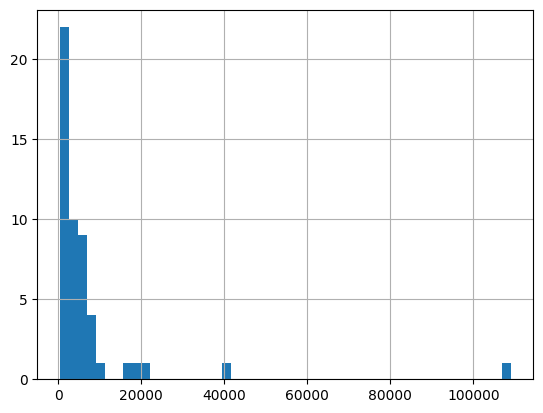

In [90]:
# Plot a histogram of the 'individuals' column in the DataFrame `df`
# 1. .hist(bins=50) -> Divide the data into 50 bins to show the frequency distribution
# 2. The resulting plot helps visualize how the values in 'individuals' are distributed
# 3. The semicolon at the end suppresses the textual output in Jupyter notebooks
df['individuals'].hist(bins=50);


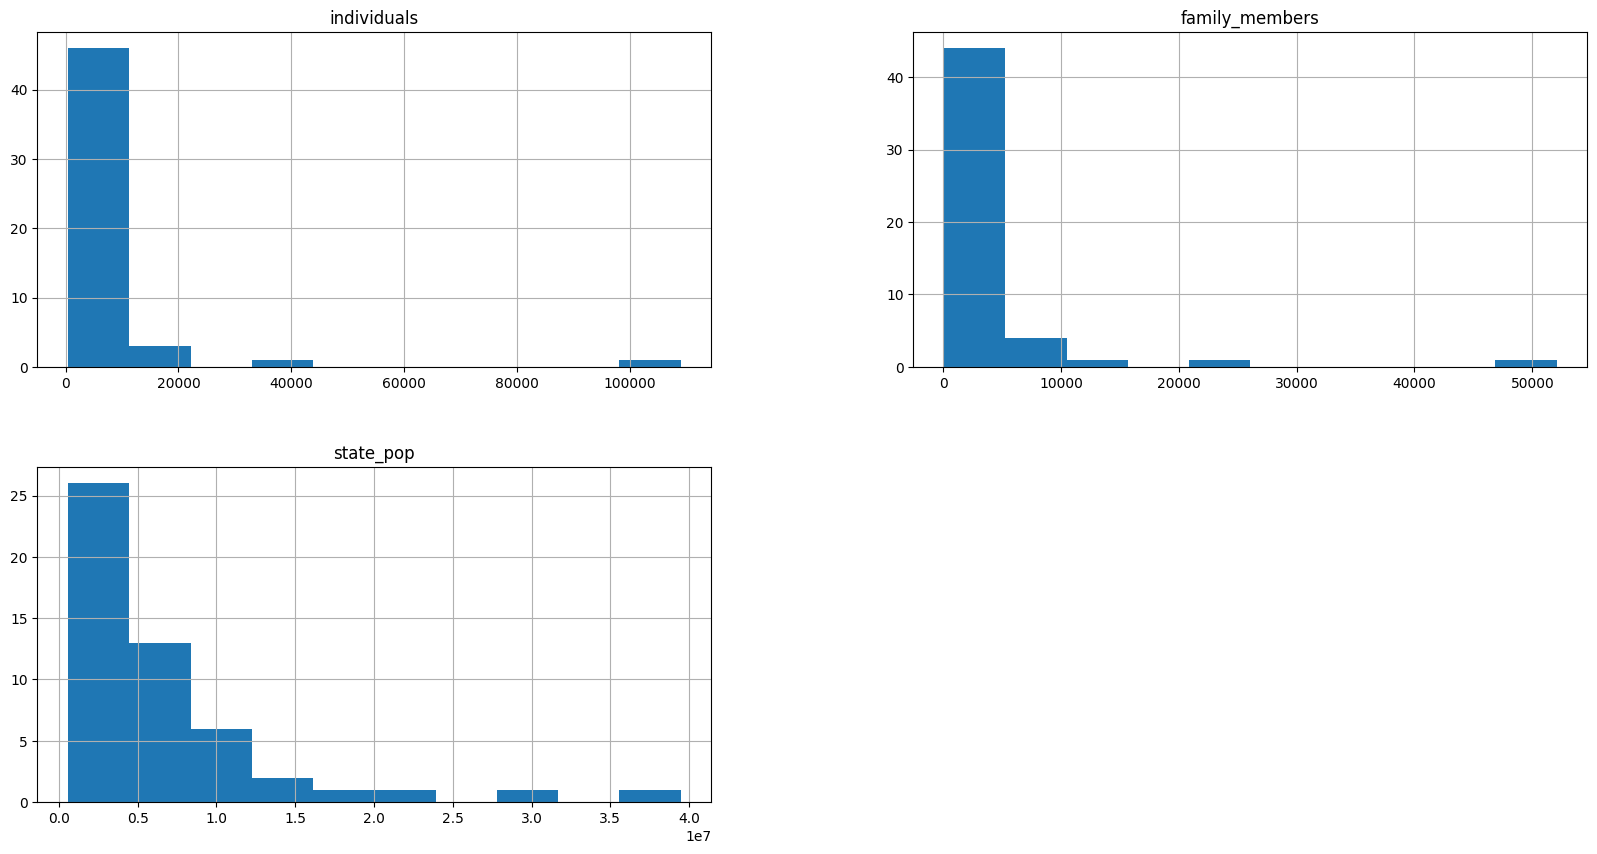

In [91]:
# Plot histograms for all numeric columns in the DataFrame `df`
# 1. .hist() -> Automatically generates a histogram for each numeric column
# 2. figsize=(20, 10) -> Set the size of the figure (width=20, height=10) for better readability
# 3. The semicolon at the end suppresses the textual output in Jupyter notebooks
df.hist(figsize=(20, 10));


<Axes: ylabel='region'>

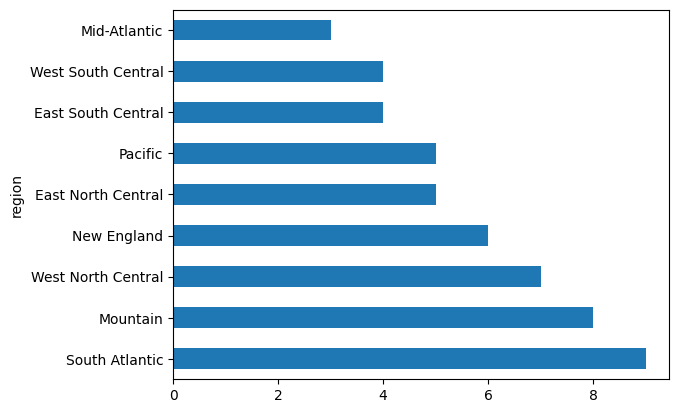

In [92]:
# Create a horizontal bar plot showing the counts of each unique value in the 'region' column
# 1. df['region'].value_counts() -> Count the occurrences of each region
# 2. .plot(kind='barh') -> Plot a horizontal bar chart of the counts
# This visualization helps quickly see which regions have the most or least entries
df['region'].value_counts().plot(kind='barh')


<Axes: title={'center': 'Relation be;4;l5typ'}, xlabel='State Pop', ylabel='Family Members'>

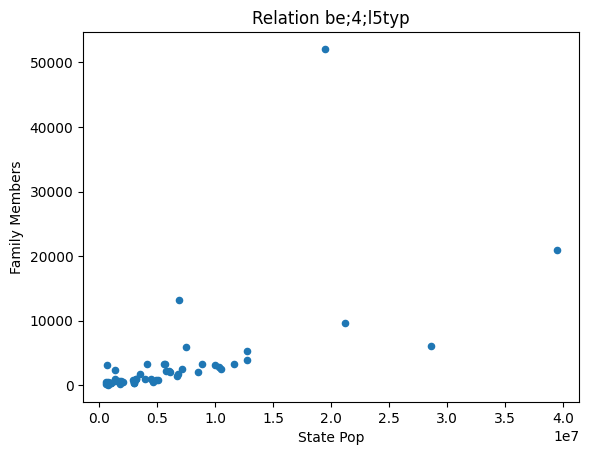

In [93]:
# Create a scatter plot to visualize the relationship between 'state_pop' and 'family_members'
# 1. kind='scatter' -> Specifies that this is a scatter plot
# 2. x='state_pop' -> Set the x-axis to the 'state_pop' column
# 3. y='family_members' -> Set the y-axis to the 'family_members' column
# 4. xlabel, ylabel -> Set custom labels for the axes
# 5. title -> Set a title for the plot
# Scatter plots are useful for observing correlations, trends, and potential outliers
df.plot(kind='scatter', x='state_pop', y='family_members', xlabel='State Pop', ylabel='Family Members', title='Relation be;4;l5typ')


<Axes: xlabel='Region', ylabel='Family Members'>

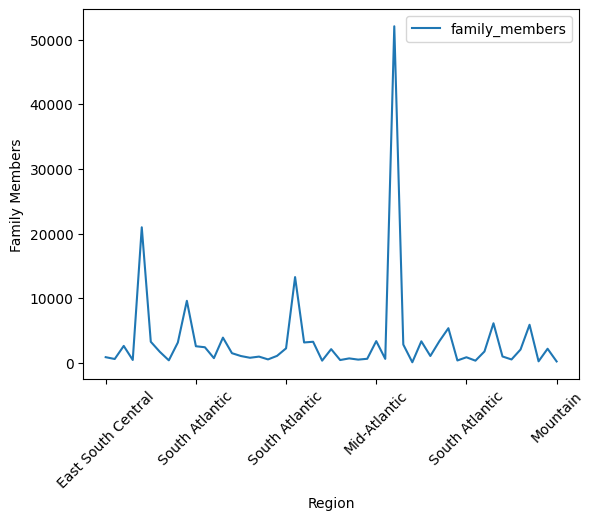

In [94]:
# Create a line plot to visualize 'family_members' across different regions
# 1. kind='line' -> Specifies a line plot
# 2. x='region' -> Set the x-axis to the 'region' column
# 3. y='family_members' -> Set the y-axis to the 'family_members' column
# 4. xlabel, ylabel -> Set custom labels for the axes
# 5. rot=45 -> Rotate x-axis labels 45 degrees for better readability
# Line plots are useful for showing trends or changes across categories or time
df.plot(kind='line', x='region', y='family_members', 
        xlabel='Region', ylabel='Family Members', rot=45)


# pandas: Dealing with NaNs (Missing Values)

## Overview
Missing data (NaN, None, NaT) is common in real-world datasets. Pandas provides comprehensive tools to detect, handle, and process missing values effectively.

## Understanding Missing Values in Pandas

### Types of Missing Values
* **`NaN`** (Not a Number) - Standard missing value for numeric data
* **`None`** - Python's null object (converted to NaN in numeric contexts)
* **`NaT`** (Not a Time) - Missing value for datetime data
* **`pd.NA`** - Experimental nullable type (pandas 1.0+)
```python
import pandas as pd
import numpy as np

# Creating missing values
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, None, 7, 8],
    'C': ['a', 'b', None, 'd']
})
```

---

## Detecting Missing Values

### Check for NaN Values
```python
# Check if values are missing (returns Boolean DataFrame)
df.isnull()   # or df.isna() (identical)

# Check if values are NOT missing
df.notnull()  # or df.notna() (identical)

# Check specific column
df['column_name'].isnull()
```

### Count Missing Values
```python
# Count NaN per column
df.isnull().sum()

# Count NaN per row
df.isnull().sum(axis=1)

# Total missing values in DataFrame
df.isnull().sum().sum()

# Percentage of missing values per column
(df.isnull().sum() / len(df)) * 100

# Missing value summary
df.isnull().sum().sort_values(ascending=False)
```

### Check if Any Missing Values Exist
```python
# Check if ANY missing values exist
df.isnull().any()           # Per column
df.isnull().any().any()     # Entire DataFrame

# Check if ALL values are missing
df.isnull().all()           # Per column
```

---

## Removing Missing Values

### Drop Rows with Missing Values
```python
# Drop rows with ANY missing values
df.dropna()

# Drop rows where ALL values are missing
df.dropna(how='all')

# Drop rows with missing values in specific columns
df.dropna(subset=['column1', 'column2'])

# Require minimum non-null values
df.dropna(thresh=2)  # Keep rows with at least 2 non-null values

# Drop in place (modify original DataFrame)
df.dropna(inplace=True)
```

### Drop Columns with Missing Values
```python
# Drop columns with ANY missing values
df.dropna(axis=1)

# Drop columns where ALL values are missing
df.dropna(axis=1, how='all')

# Drop columns with too many missing values
threshold = len(df) * 0.5  # 50% threshold
df.dropna(thresh=threshold, axis=1)
```

---

## Filling Missing Values

### Fill with Constant Values
```python
# Fill all NaN with 0
df.fillna(0)

# Fill with different values per column
df.fillna({'column1': 0, 'column2': 'Unknown', 'column3': -1})

# Fill string columns with empty string
df.fillna('')

# Fill in place
df.fillna(0, inplace=True)
```

### Fill with Statistical Measures
```python
# Fill with mean
df['column'].fillna(df['column'].mean())

# Fill with median
df['column'].fillna(df['column'].median())

# Fill with mode (most frequent value)
df['column'].fillna(df['column'].mode()[0])

# Fill all numeric columns with their means
df.fillna(df.mean())

# Fill all numeric columns with their medians
df.fillna(df.median())
```

### Forward Fill and Backward Fill
```python
# Forward fill (propagate last valid value forward)
df.fillna(method='ffill')  # or method='pad'
df.ffill()  # Shorthand

# Backward fill (use next valid value)
df.fillna(method='bfill')  # or method='backfill'
df.bfill()  # Shorthand

# Limit the number of consecutive fills
df.fillna(method='ffill', limit=2)

# Forward fill within groups
df.groupby('category')['value'].ffill()
```

### Interpolation
```python
# Linear interpolation
df['column'].interpolate()

# Interpolate entire DataFrame
df.interpolate()

# Different interpolation methods
df.interpolate(method='linear')      # Linear (default)
df.interpolate(method='polynomial', order=2)
df.interpolate(method='spline', order=3)
df.interpolate(method='nearest')

# Time-based interpolation (requires DatetimeIndex)
df.interpolate(method='time')

# Limit interpolation direction
df.interpolate(limit_direction='forward')   # Only forward
df.interpolate(limit_direction='backward')  # Only backward
df.interpolate(limit_direction='both')      # Both directions
```

---

## Replacing Values

### Replace Specific Values with NaN
```python
# Replace specific value with NaN
df.replace(0, np.nan)

# Replace multiple values
df.replace([0, -999, -1], np.nan)

# Replace per column
df.replace({'column1': {0: np.nan}, 'column2': {-999: np.nan}})
```

### Replace NaN with Specific Values
```python
# Replace NaN with value
df.replace(np.nan, 0)

# Using where/mask
df.where(df.notnull(), 0)  # Replace NaN with 0
```

---

## Advanced Techniques

### Conditional Filling
```python
# Fill based on condition
df.loc[df['age'].isnull(), 'age'] = df['age'].median()

# Fill based on another column
df['salary'].fillna(df.groupby('department')['salary'].transform('mean'))

# Complex conditional filling
df['value'] = df.apply(
    lambda row: row['backup_value'] if pd.isnull(row['value']) else row['value'],
    axis=1
)
```

### Group-Based Filling
```python
# Fill with group mean
df['value'] = df.groupby('category')['value'].transform(
    lambda x: x.fillna(x.mean())
)

# Fill with group median
df['value'] = df.groupby('category')['value'].transform(
    lambda x: x.fillna(x.median())
)

# Forward fill within groups
df['value'] = df.groupby('category')['value'].ffill()
```

### Creating Missing Value Indicators
```python
# Create indicator column for missing values
df['is_missing'] = df['column'].isnull().astype(int)

# Create indicators for all columns
for col in df.columns:
    df[f'{col}_missing'] = df[col].isnull().astype(int)
```

### Filter Rows Based on Missing Values
```python
# Get rows with missing values
df[df.isnull().any(axis=1)]

# Get rows without missing values
df[df.notnull().all(axis=1)]

# Get rows with missing values in specific column
df[df['column'].isnull()]

# Get rows with non-missing values in specific column
df[df['column'].notnull()]
```

---

## Handling Missing Values in Calculations

### Automatic Exclusion
```python
# Most operations automatically skip NaN
df['column'].sum()    # Skips NaN
df['column'].mean()   # Skips NaN
df['column'].std()    # Skips NaN

# Explicitly include NaN (returns NaN if any NaN present)
df['column'].sum(skipna=False)
```

### Counting with Missing Values
```python
# Count non-missing values
df['column'].count()

# Count including missing (use size or len)
df['column'].size
len(df['column'])
```

---

## Best Practices for Handling Missing Data

### 1. Understand Why Data is Missing
```python
# Analyze missing patterns
import matplotlib.pyplot as plt

# Missing value heatmap
missing = df.isnull()
plt.figure(figsize=(12, 6))
plt.imshow(missing, cmap='binary', aspect='auto')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Pattern')
```

### 2. Document Your Approach
```python
# Create a comprehensive missing value report
def missing_value_report(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    
    report = pd.DataFrame({
        'Total Missing': total,
        'Percent Missing': percent
    })
    
    return report[report['Total Missing'] > 0]

print(missing_value_report(df))
```

### 3. Choose Appropriate Strategy
```python
# Decision tree for handling missing values:

# If < 5% missing -> Drop rows
if (df.isnull().sum() / len(df) < 0.05).all():
    df = df.dropna()

# If column > 50% missing -> Drop column
high_missing_cols = df.columns[df.isnull().sum() / len(df) > 0.5]
df = df.drop(columns=high_missing_cols)

# If numeric -> Fill with median/mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# If categorical -> Fill with mode or 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown', inplace=True)
```

### 4. Validate After Handling
```python
# Verify no missing values remain (if that's the goal)
assert df.isnull().sum().sum() == 0, "Missing values still present!"

# Check data distribution hasn't changed dramatically
print("Before:", original_df['column'].describe())
print("After:", df['column'].describe())
```

---

## Common Pitfalls

### 1. Chained Assignment Warning
```python
# ❌ BAD: Can cause SettingWithCopyWarning
df[df['age'] > 18]['salary'].fillna(0)

# ✅ GOOD: Use loc
df.loc[df['age'] > 18, 'salary'] = df.loc[df['age'] > 18, 'salary'].fillna(0)
```

### 2. Comparison with NaN
```python
# ❌ BAD: NaN == NaN is always False
df[df['column'] == np.nan]

# ✅ GOOD: Use isnull() or isna()
df[df['column'].isnull()]
```

### 3. Mathematical Operations with NaN
```python
# NaN propagates in operations
np.nan + 5      # Returns NaN
np.nan * 0      # Returns NaN (not 0!)

# Use fillna before operations if needed
(df['col1'].fillna(0) + df['col2'].fillna(0))
```

---

## Quick Reference
```python
# Detection
df.isnull()                    # Check for NaN
df.isnull().sum()              # Count NaN per column
df.isnull().any()              # Check if any NaN

# Removal
df.dropna()                    # Drop rows with any NaN
df.dropna(axis=1)              # Drop columns with any NaN
df.dropna(subset=['col'])      # Drop based on specific columns

# Filling
df.fillna(0)                   # Fill with constant
df.fillna(df.mean())           # Fill with mean
df.ffill()                     # Forward fill
df.bfill()                     # Backward fill
df.interpolate()               # Interpolate

# Group-based
df.groupby('cat')['val'].transform(lambda x: x.fillna(x.mean()))

# Filtering
df[df['col'].notnull()]        # Keep non-null rows
df[df['col'].isnull()]         # Keep null rows
```

---

## Summary: Decision Framework
```python
# 1. Small amount missing (< 5%) -> Drop
if missing_percentage < 0.05:
    df.dropna()

# 2. Column mostly missing (> 50%) -> Drop column
elif missing_percentage > 0.50:
    df.drop(columns=['column'])

# 3. Numeric data -> Fill with mean/median
elif df['column'].dtype in [np.float64, np.int64]:
    df['column'].fillna(df['column'].median())

# 4. Categorical data -> Fill with mode or 'Unknown'
elif df['column'].dtype == 'object':
    df['column'].fillna(df['column'].mode()[0])

# 5. Time series -> Forward/backward fill or interpolate
elif is_time_series:
    df['column'].ffill()  # or interpolate()

# 6. Systematic missingness -> Keep as indicator
else:
    df['column_missing'] = df['column'].isnull()
```

In [95]:
# Load a CSV file into a pandas DataFrame

# 1. FILE_PATH -> Construct the full path to the CSV file
#    - os.getcwd() gives the current working directory
#    - os.path.join(...) ensures the path works on any operating system
#    - 'dataset', 'housing.csv' -> Folder and filename of the CSV
FILE_PATH = os.path.join(os.getcwd(), 'dataset', 'housing.csv')

# 2. pd.read_csv(FILE_PATH) -> Read the CSV file into a pandas DataFrame
df = pd.read_csv(FILE_PATH)

# 3. df.head() -> Display the first 5 rows to quickly inspect the data
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [96]:
# Check the size of the DataFrame `df`

# 1. df.shape -> Returns a tuple (number_of_rows, number_of_columns)
# 2. len(df)  -> Returns the number of rows in the DataFrame
df.shape, len(df)


((20640, 10), 20640)

In [97]:
# Display a concise summary of the DataFrame `df`
# Provides information including:
# - Number of entries (rows)
# - Number of columns
# - Column names and data types
# - Non-null counts for each column
# - Memory usage of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [98]:
# Generate descriptive statistics for all numeric columns in the DataFrame `df`
# Includes count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)
# Useful for getting a quick overview of the distribution and range of numeric data
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [99]:
# Check for missing values (NaNs) in the DataFrame `df`
# 1. df.isna() -> Returns a DataFrame of the same shape with True for NaNs and False otherwise
# 2. .sum() -> Sum along each column, giving the total number of missing values per column
df.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [100]:
# Calculate the percentage of missing values in each column of the DataFrame `df`
# 1. df.isna().sum() -> Count the number of missing values per column
# 2. df.shape[0] -> Total number of rows in the DataFrame
# 3. Division gives the proportion of missing values per column
df.isna().sum() / df.shape[0]


longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [101]:
# Check which columns in the DataFrame `df` contain at least one missing value (NaN)
# 1. df.isna() -> Returns a DataFrame of booleans: True where values are NaN
# 2. .any() -> Returns True for each column that has at least one True (i.e., at least one missing value)
df.isna().any()


longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

<Axes: >

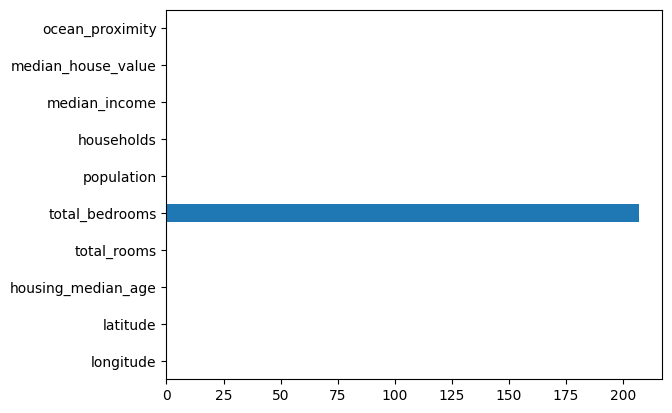

In [102]:
# Visualize the number of missing values in each column of the DataFrame `df` using a horizontal bar chart
# 1. df.isna().sum() -> Count the number of missing values per column
# 2. .plot(kind='barh') -> Plot a horizontal bar chart of these counts
# This helps quickly identify which columns have the most missing data
df.isna().sum().plot(kind='barh')


In [103]:
# Filter the DataFrame `df` to show only rows where the 'total_bedrooms' column has missing values (NaN)
# 1. df['total_bedrooms'].isna() -> Returns a boolean Series: True where 'total_bedrooms' is NaN
# 2. df[...] -> Selects rows corresponding to True values
# This allows you to inspect the rows with missing 'total_bedrooms' values
df[df['total_bedrooms'].isna()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


## Import
```python
import missingno as msno
```

## Four Key Visualizations

### 1. Matrix - See where data is missing
```python
msno.matrix(df, figsize=(12, 6), sparkline=True)
```
- White = missing, Black = present
- Shows location and patterns of NaN values

### 2. Bar Chart - Count non-null values
```python
msno.bar(df)
```
- Bar height = completeness per column
- Quick comparison of data quality

### 3. Heatmap - Nullity correlation
```python
msno.heatmap(df)
```
- +1 = columns missing together
- -1 = one missing when other present
- 0 = independent patterns

### 4. Dendrogram - Cluster by missingness
```python
msno.dendrogram(df)
```
- Groups columns with similar missing patterns
- Identifies related data issues

In [104]:
# Import the missingno library for visualizing missing data
# missingno provides convenient plots to understand the distribution and patterns of NaN values
import missingno as msno


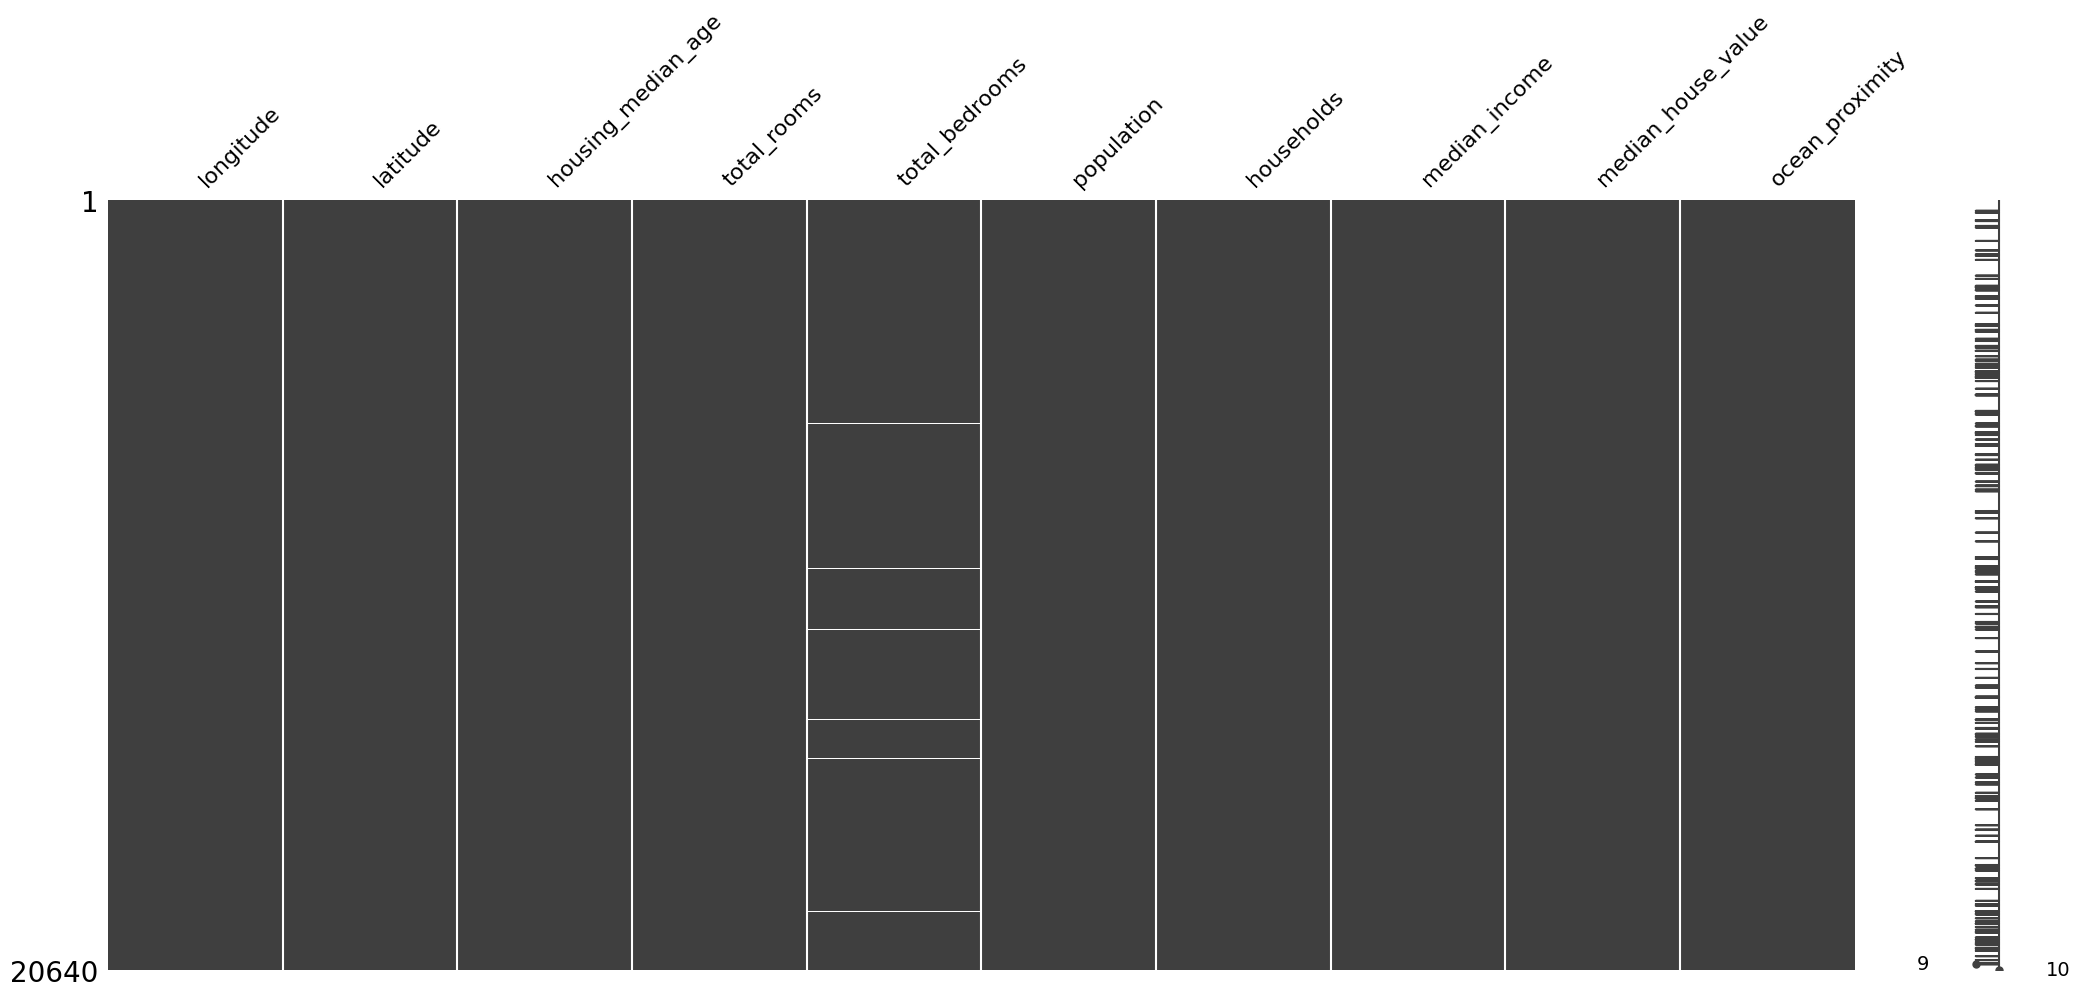

In [105]:
# Visualize missing data in the DataFrame `df` as a matrix
# 1. msno.matrix(df) -> Plots a matrix where each column is represented, and missing values are shown as gaps
# 2. Useful for quickly spotting patterns of missing data across rows and columns
# 3. The semicolon at the end suppresses textual output in Jupyter notebooks
msno.matrix(df);


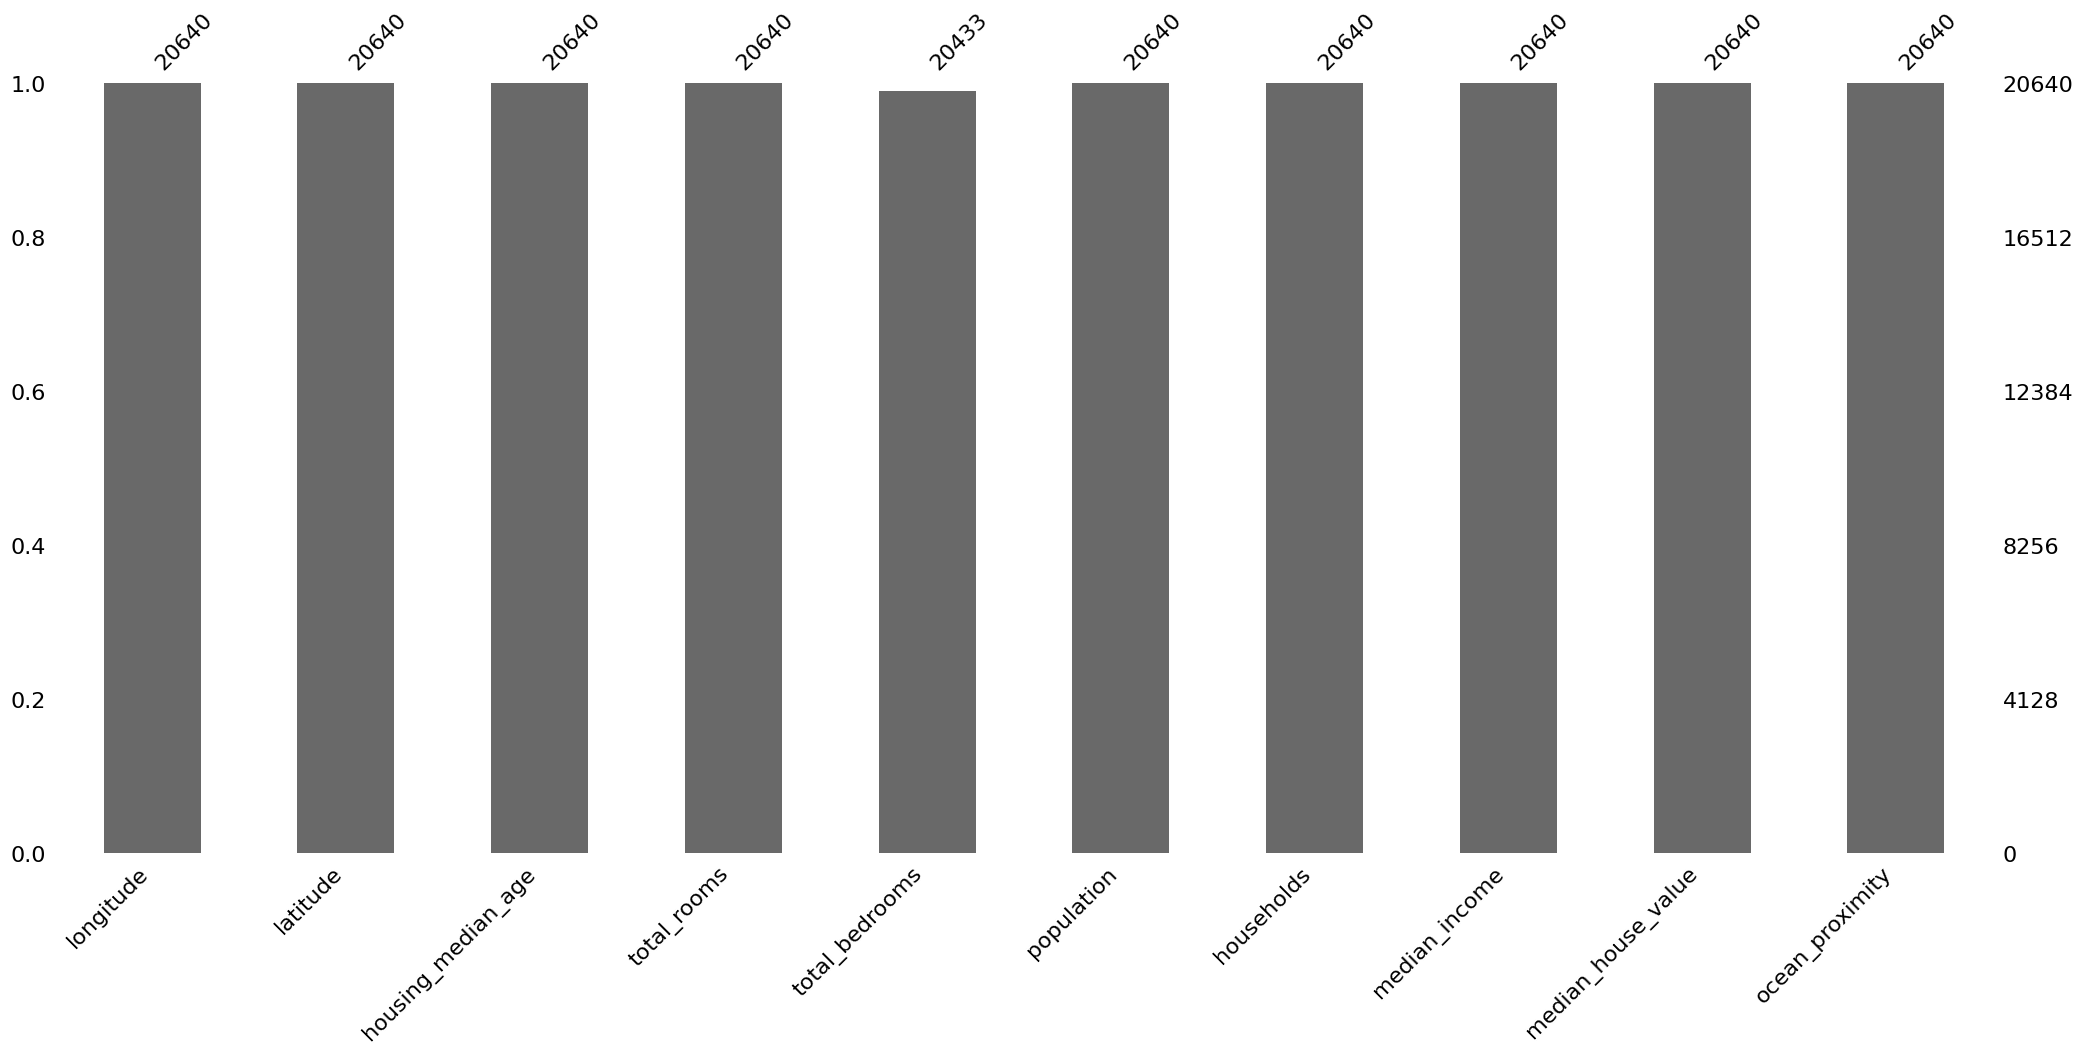

In [106]:
# Visualize missing data in the DataFrame `df` as a bar chart
# 1. msno.bar(df) -> Plots a bar for each column representing the number of non-missing values
# 2. Columns with missing values will have shorter bars
# 3. Useful for quickly seeing which columns have missing data and their relative completeness
msno.bar(df);


In [107]:
# Drop rows with missing values from the DataFrame `df` and check the resulting shape

# 1. df.dropna(subset=None, axis=0)
#    - subset=None -> Consider all columns when looking for NaNs
#    - axis=0 -> Drop rows (not columns) that contain any NaN
# 2. Store the cleaned DataFrame in `df_dropped`
df_dropped = df.dropna(subset=None, axis=0)

# 3. df_dropped.shape -> Return the shape (number_of_rows, number_of_columns) after dropping rows with NaNs
df_dropped.shape


(20433, 10)

In [108]:
# Check for missing values in the cleaned DataFrame `df_dropped`
# 1. df_dropped.isna() -> Returns a boolean DataFrame: True where values are NaN
# 2. .sum() -> Sum along each column to get the total number of missing values per column
# After dropping rows with NaNs, this should return 0 for all columns
df_dropped.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [109]:
# Impute missing values in the 'total_bedrooms' column using the median

# 1. Create a deep copy of the original DataFrame `df` to avoid modifying it directly
df_copy = df.copy(deep=True)

# 2. Fill NaN values in 'total_bedrooms' with the median of that column
#    - df['total_bedrooms'].median() -> Compute the median of the column
#    - .fillna(value=...) -> Replace NaNs with the specified value
df_copy['total_bedrooms'] = df_copy['total_bedrooms'].fillna(value=df['total_bedrooms'].median())


In [110]:
# Check for missing values in the DataFrame `df_copy` after imputation
# 1. df_copy.isna() -> Returns a boolean DataFrame: True where values are NaN
# 2. .sum() -> Sum along each column to get the total number of missing values per column
# After imputing 'total_bedrooms', the count of NaNs in that column should now be 0
df_copy.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [111]:
# Display the shape of the DataFrame `df_copy` after imputation
# 1. df_copy.shape -> Returns a tuple (number_of_rows, number_of_columns)
# Useful to confirm that the number of rows and columns remains unchanged after filling missing values
df_copy.shape


(20640, 10)

In [112]:
# Access the 'ocean_proximity' column of the DataFrame `df`
# 1. df['ocean_proximity'] -> Returns a pandas Series containing all values in that column
# Useful for inspecting categorical data, unique values, or preparing for encoding
df['ocean_proximity']


0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

------

**Keep Learning, Keep Coding!** 💪  
*Happy Data Analysis!* 🐼

— Your Pandas Reference Guide  
*Created by Mohamed Zahran*